# Diabetes Predictor


### Importing the Necessary Modules 

In [5]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the Dataset
df = pd.read_csv('/content/diab.csv')

# Sample
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

### Understanding  the  Dataset

In [7]:
# Number of rows and columns of the dataset
df.shape

(2000, 9)

In [8]:
# Basic information about the datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
# Descriptive Statistics of the Dataset
df.describe().T

count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.19300    8.149901   0.000  27.375   
DiabetesPedigreeFunction  2000.0    0.47093    0.323553   0.078   0.244   
Age                       2000.0   33.09050   11.786423  21.000  24.000   
Outcome                   2000.0    0.34200    0.474498   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    40.000  130.000  744.00  
BMI                        32.300   36.800   80.60  
DiabetesPedigreeFunction    0.376    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

In [10]:
# Check for null Values
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Let us replace the DiabetesPedigreeFunction as DPF
df = df.rename(columns={"DiabetesPedigreeFunction":"DPF"}) 

# Sample
df.sample()     

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1879            0      146             82              0        0  40.5   

        DPF  Age  Outcome  
1879  1.781   44        0

In [12]:
# Let us replace the Outcome (Target Variable) with Yes / No to get better Visualizations
df['Outcome'].replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

# Sample
df.sample()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
185            7      194             68             28        0  35.9  0.745   

     Age Outcome  
185   41     Yes

In [13]:
# Check the number of Yes and No in the Outcome column
df['Outcome'].value_counts()

No     1316
Yes     684
Name: Outcome, dtype: int64

In [14]:
# Percentage of the Split
df['Outcome'].value_counts(normalize=True)

No     0.658
Yes    0.342
Name: Outcome, dtype: float64

### Exploratory Data Analysis

In [15]:
from statsmodels.api import qqplot
from scipy import stats

In [16]:
''' Function takes a single dataframe column name as argument and
 plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, KDE plot and cumulative density plot) '''
def plot_distribution(col_name):

  # Sets 2 x 2 subplots with figure size of (15,10)
  fig,axes = plt.subplots( 2, 2, figsize = (15,10) )

  # Displays histogram of the given dataframe column
  sns.histplot( x = col_name, data = df, ax = axes[0][0], bins = 20 )

  # Displays quantile-quantile plot of the given dataframe column
  qqplot( data = df[col_name], ax = axes[0][1], line = "45", fit = True )

  # Displays kernel density estimate plot of the given dataframe column
  sns.kdeplot( x = col_name, data= df, ax = axes[1][0], fill = True )

  # Displays cumulative density plot of the given dataframe column 
  sns.kdeplot( x = col_name, data= df, ax = axes[1][1], fill = True, cumulative = True ) 

  # Sets the title for the subplot as "Distribution of "  
  plt.suptitle( "Distribution of " + col_name )

  plt.show()  
     

In [17]:

''' function takes a single dataframe column name as argument and
    plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)'''
def plot_stats(col_name):

  # Sets 2 x 2 subplots with figure size of (15,10)
  fig,axes = plt.subplots( 2, 2, figsize = (15,10) )

  # Displays boxplot of the given dataframe column
  sns.boxplot( y = col_name, x = "Outcome", data = df, ax = axes[0][0], palette = "viridis_r" )

  # Displays violinplot of the given dataframe column
  sns.violinplot( y = col_name, x = "Outcome", data = df, ax = axes[0][1],  split = True, palette = "viridis_r" )

  # Displays swarmplot of the given dataframe column
  sns.swarmplot( y = col_name, x = "Outcome", data = df, ax = axes[1][0], palette = "viridis_r" ) 

  # Displays barplot of the given dataframe column respect to 'Outcome' column
  sns.barplot( y = col_name, x = "Outcome", data = df, hue="Outcome", ax = axes[1][1], palette = "viridis_r" )

  # Sets the title for the subplot as "Statistics of "
  plt.suptitle( "Statistics of " + col_name )

  plt.show()  

In [18]:
''' function takes a single dataframe column name as argument and
  plots a single plot contains kernel density estimate plot'''
def plot_kde(col_name):

  # Sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
  facet = sns.FacetGrid( data = df, hue = "Outcome", aspect = 4, palette = "bright")

  # Kernel density plot of the given dataframe column respect to the dependent column "Outcome"
  facet.map(sns.kdeplot, col_name, shade = True)

  # Sets the x axis from 0 to maximum value of the column
  facet.set(xlim = (0, df[col_name].max()))

  # Add legend to the plot
  facet.add_legend()

  # Sets the title for the plot as " respect to Outcome"
  plt.title( col_name + " respect to Outcome")
  
  plt.show() 

### Column Name - Outcome

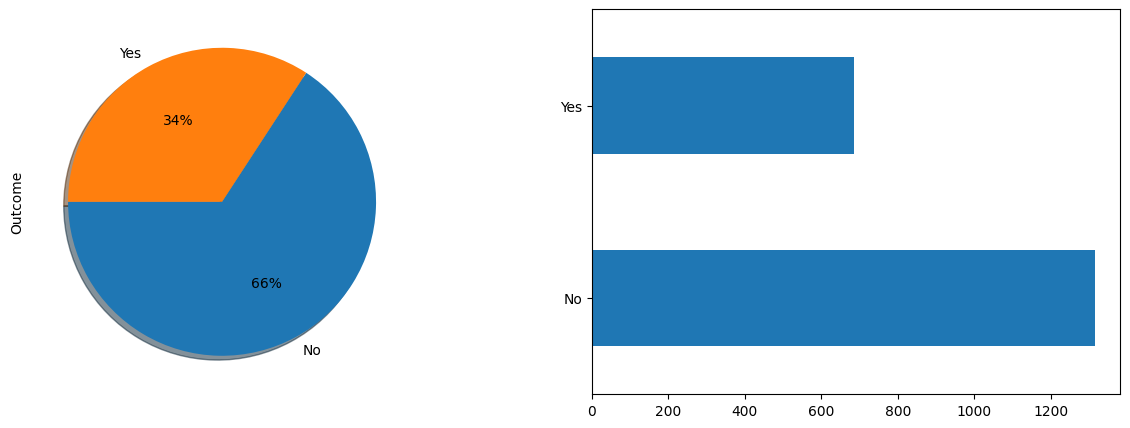

In [19]:
# Sets 1 x 2 subplots with figure size of (14,5)
fig, ax = plt.subplots( 1, 2, figsize = (15,5))

# Plots pie chart of Outcome column with % percentage
df.Outcome.value_counts().plot.pie(autopct="%.0f%%", shadow=True, startangle=180, ax=ax[0])

# Plots bar chart of Outcome column value counts
df.Outcome.value_counts().plot.barh(ax = ax[1])

plt.show() 

### Pregnancies

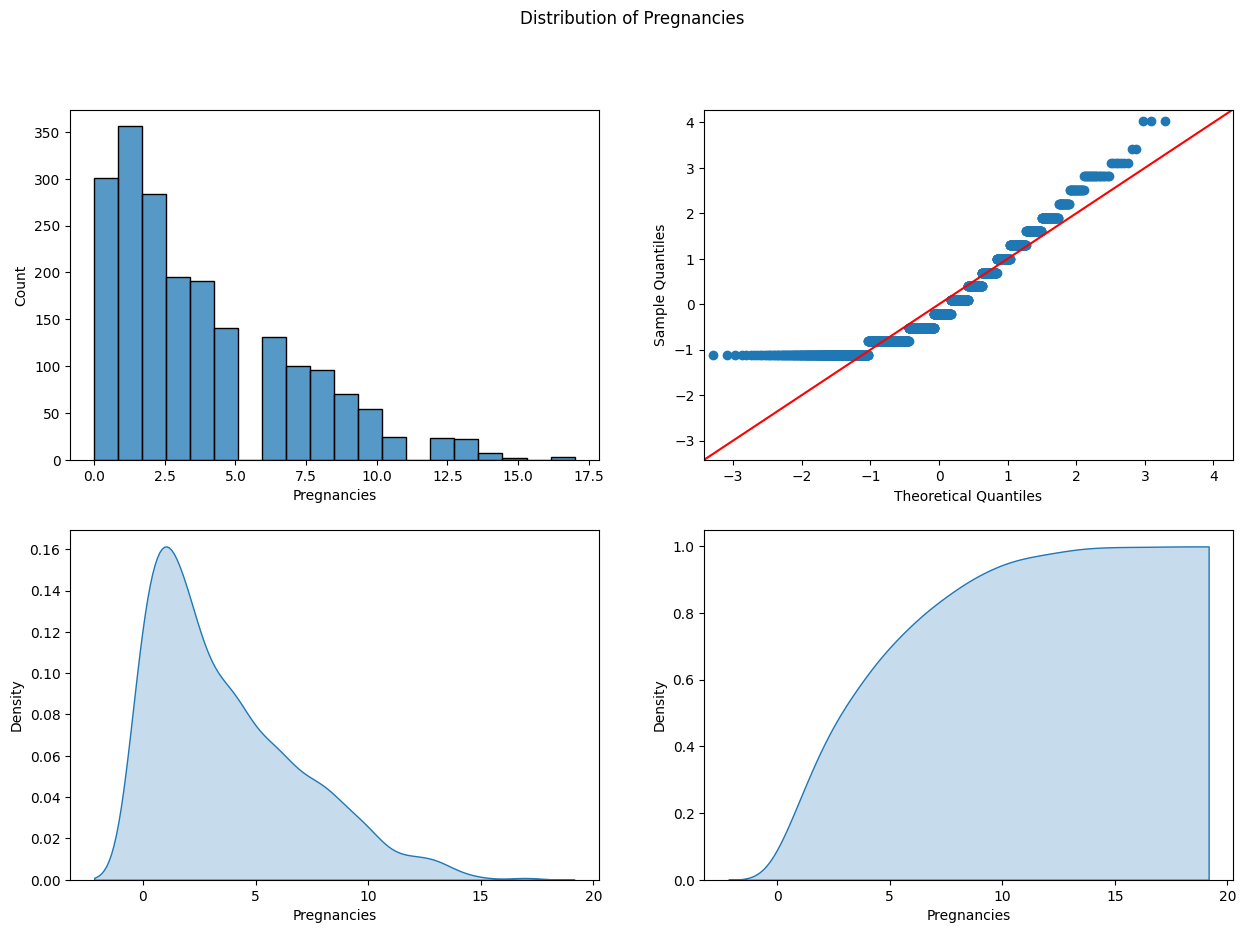

In [20]:
plot_distribution('Pregnancies')

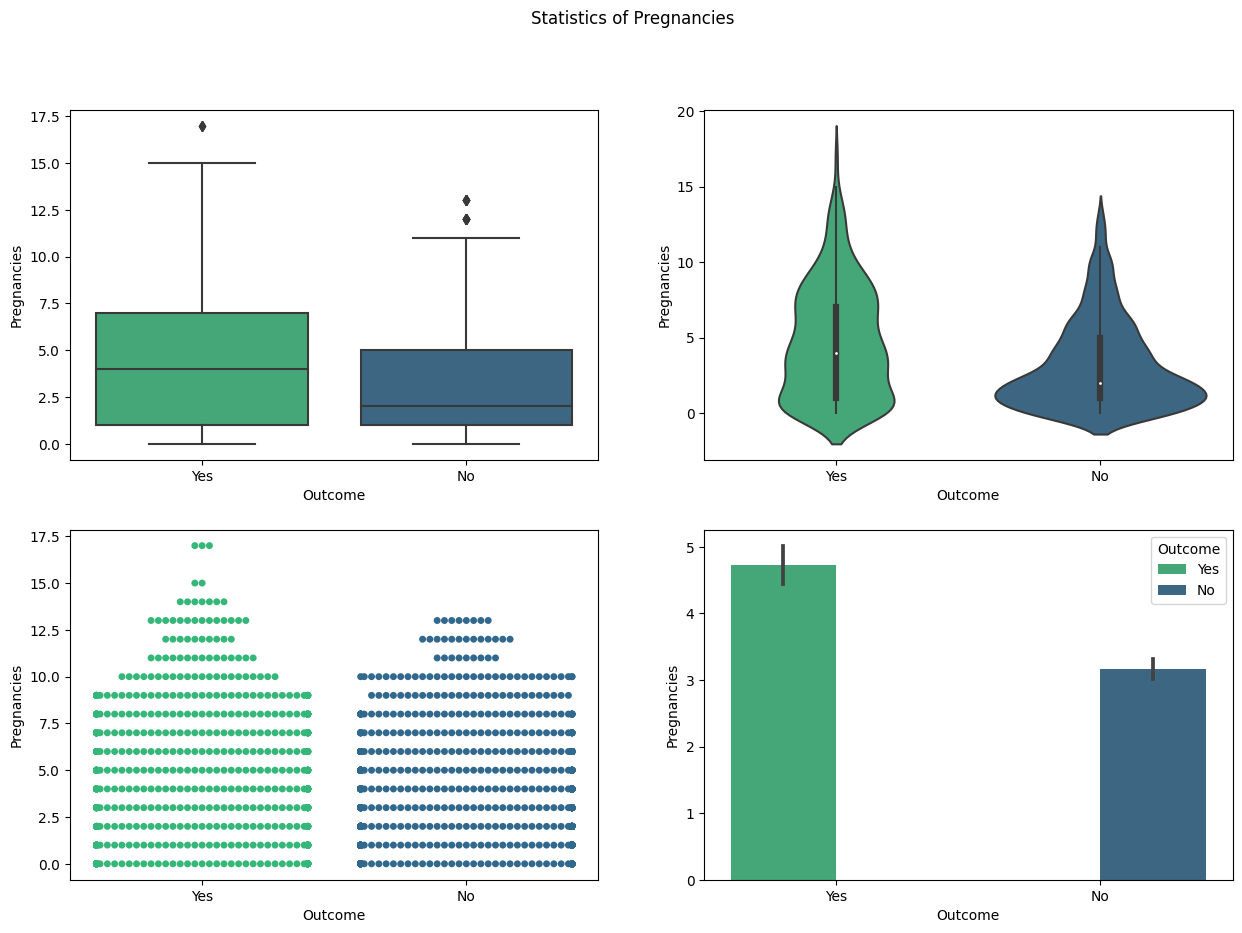

In [21]:
plot_stats('Pregnancies')

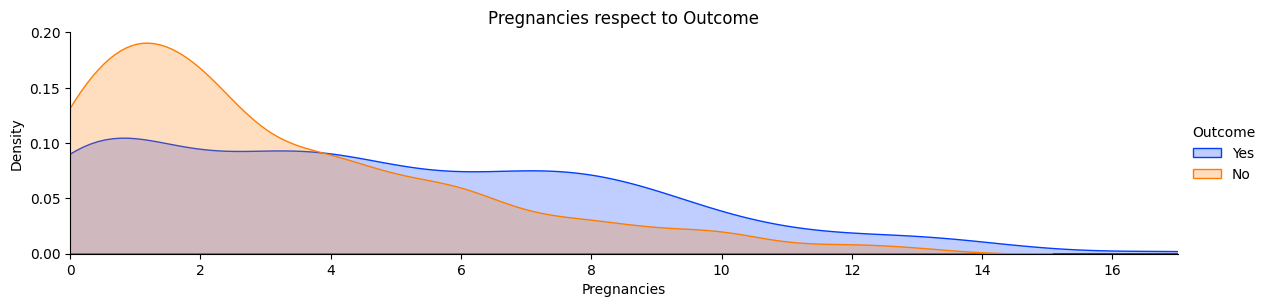

In [22]:
plot_kde('Pregnancies')

### Glucose

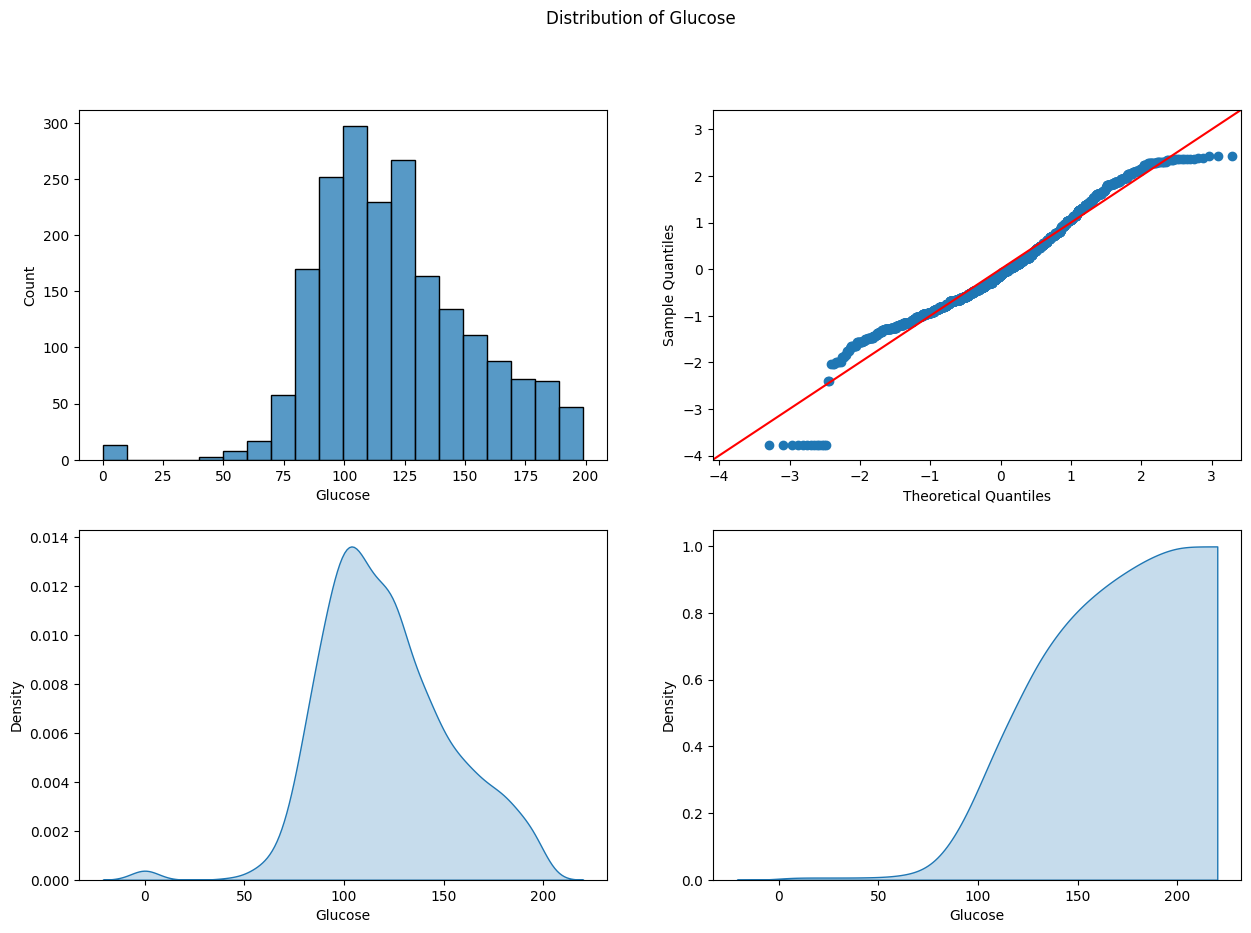

In [23]:
plot_distribution('Glucose')

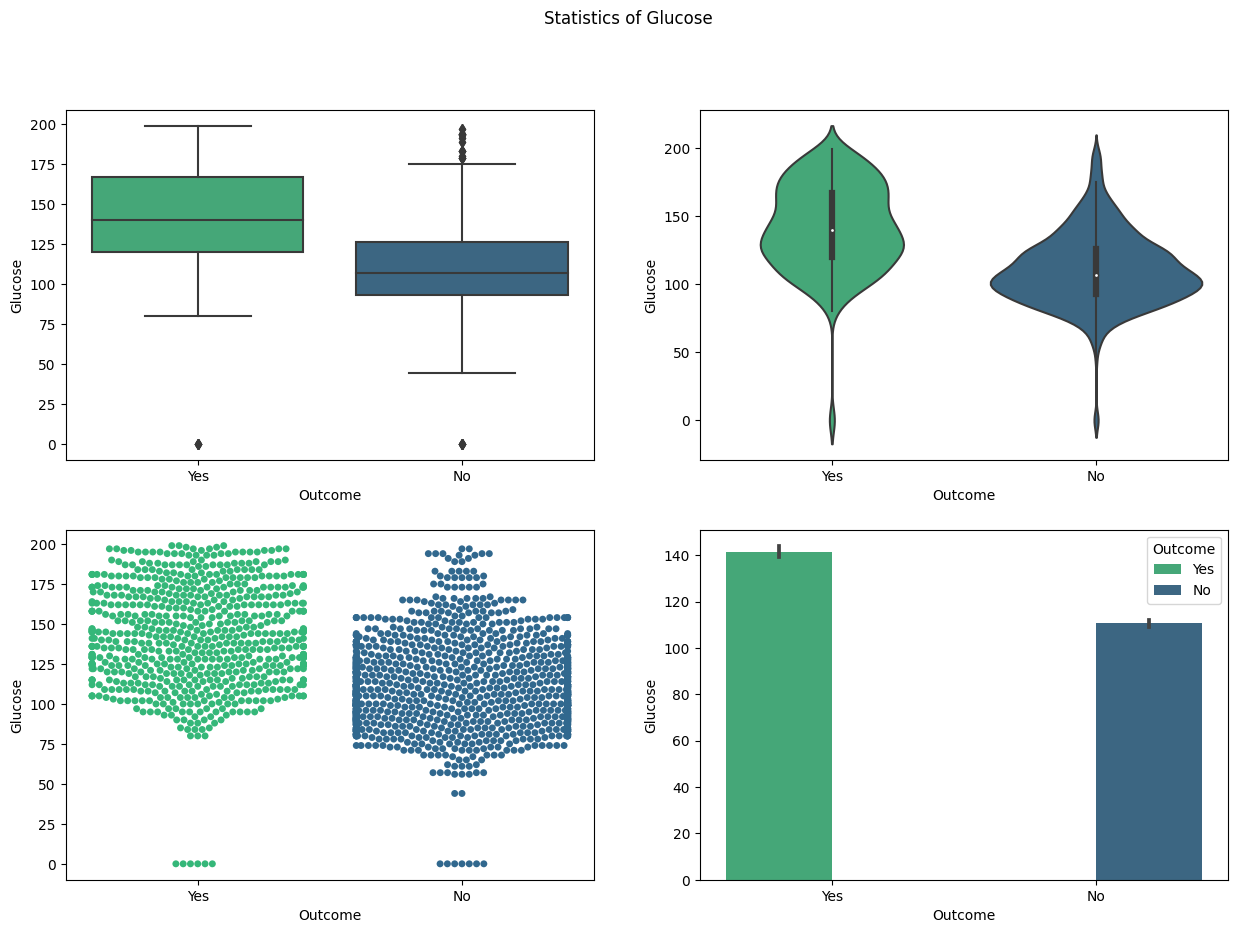

In [24]:
plot_stats('Glucose')

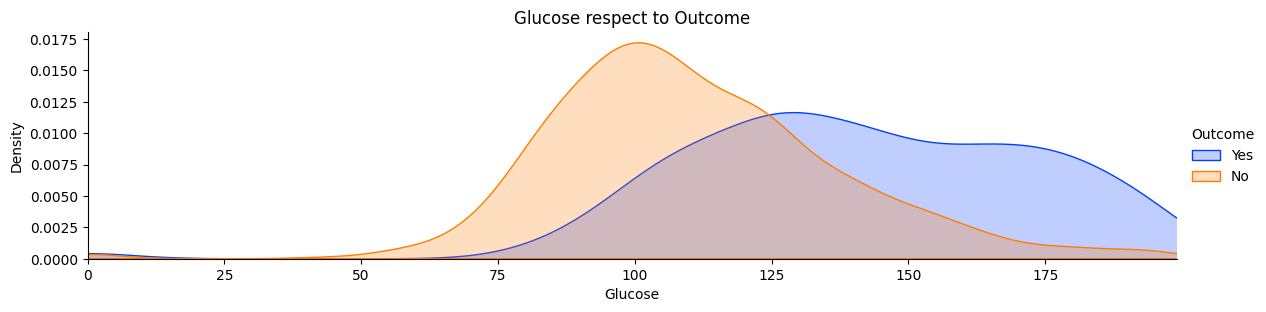

In [25]:
plot_kde('Glucose')

### Blood Pressure

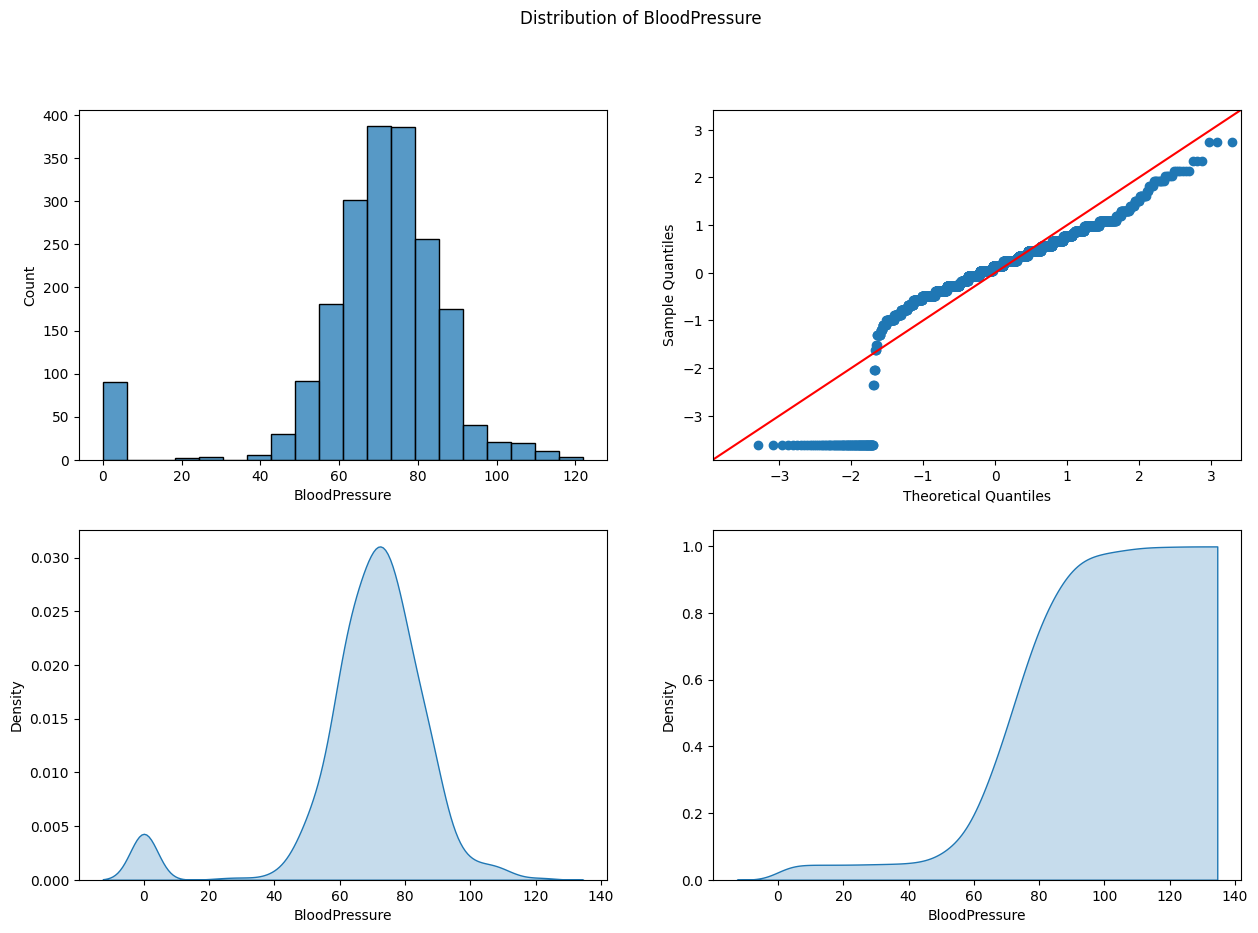

In [26]:
plot_distribution('BloodPressure')

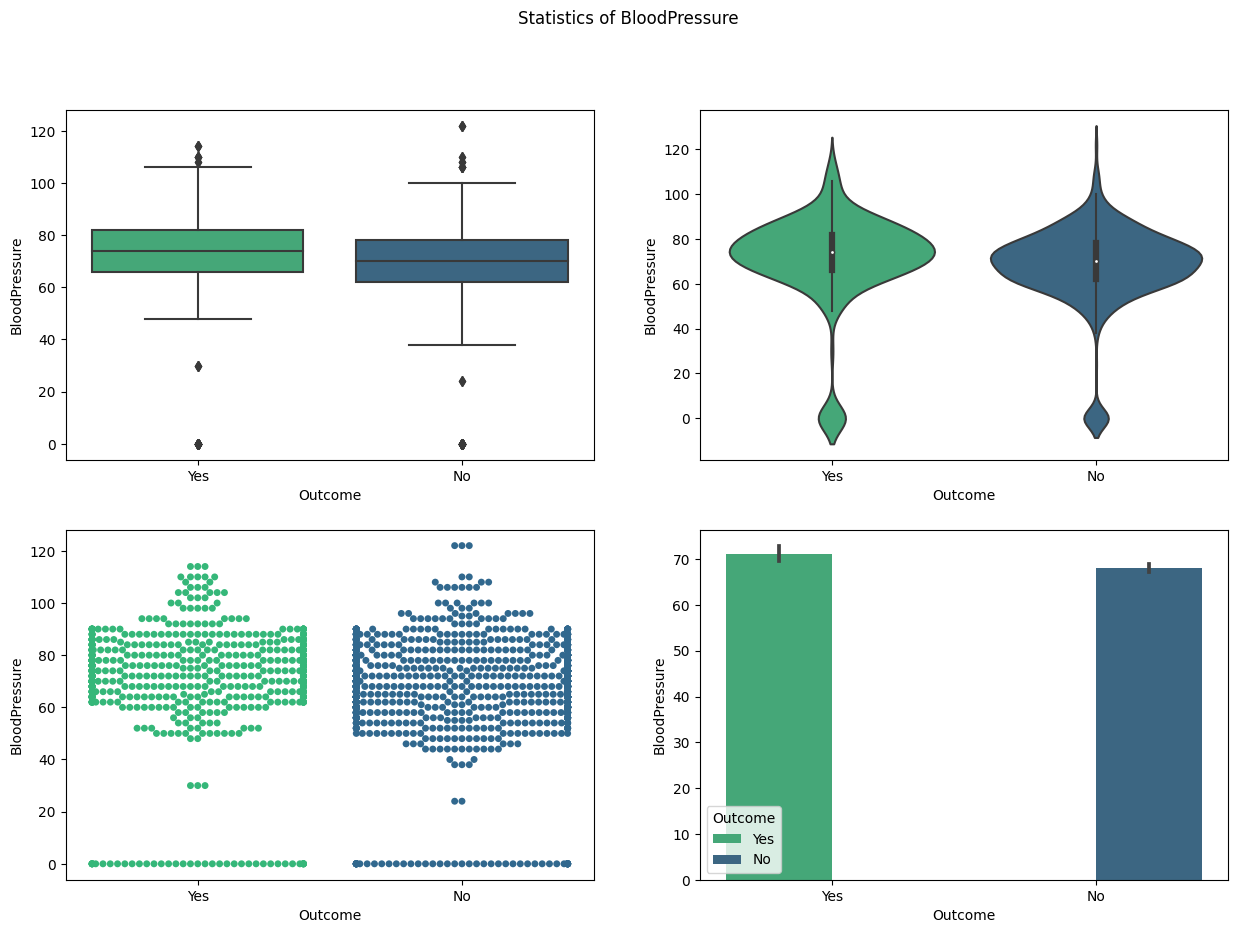

In [27]:
plot_stats('BloodPressure')

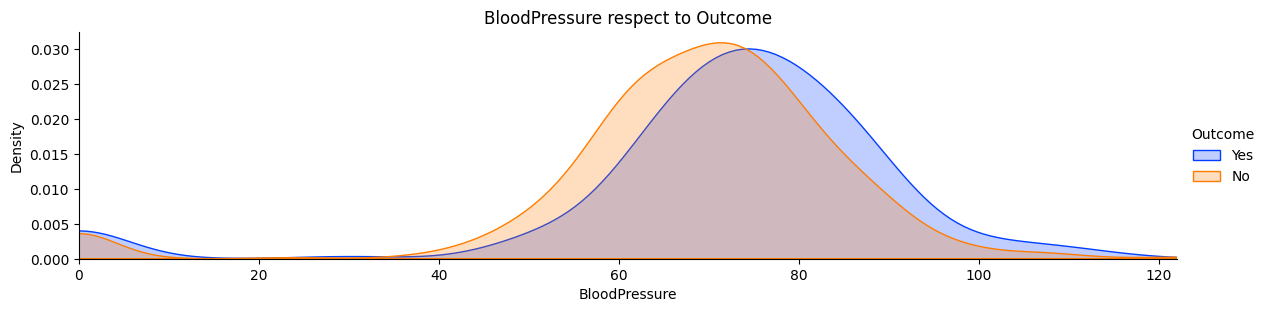

In [28]:
plot_kde('BloodPressure')

### SkinThickness

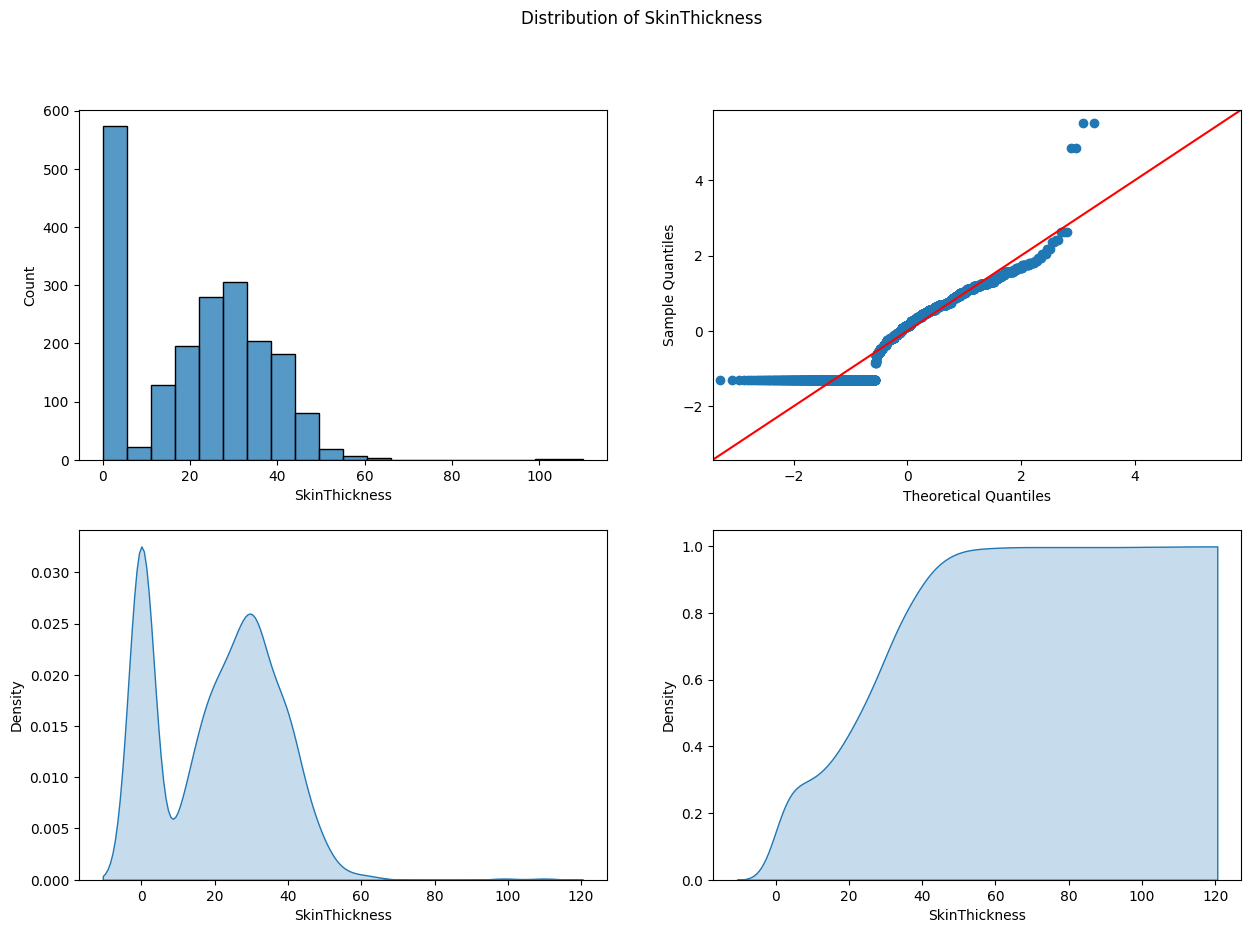

In [29]:
plot_distribution('SkinThickness')

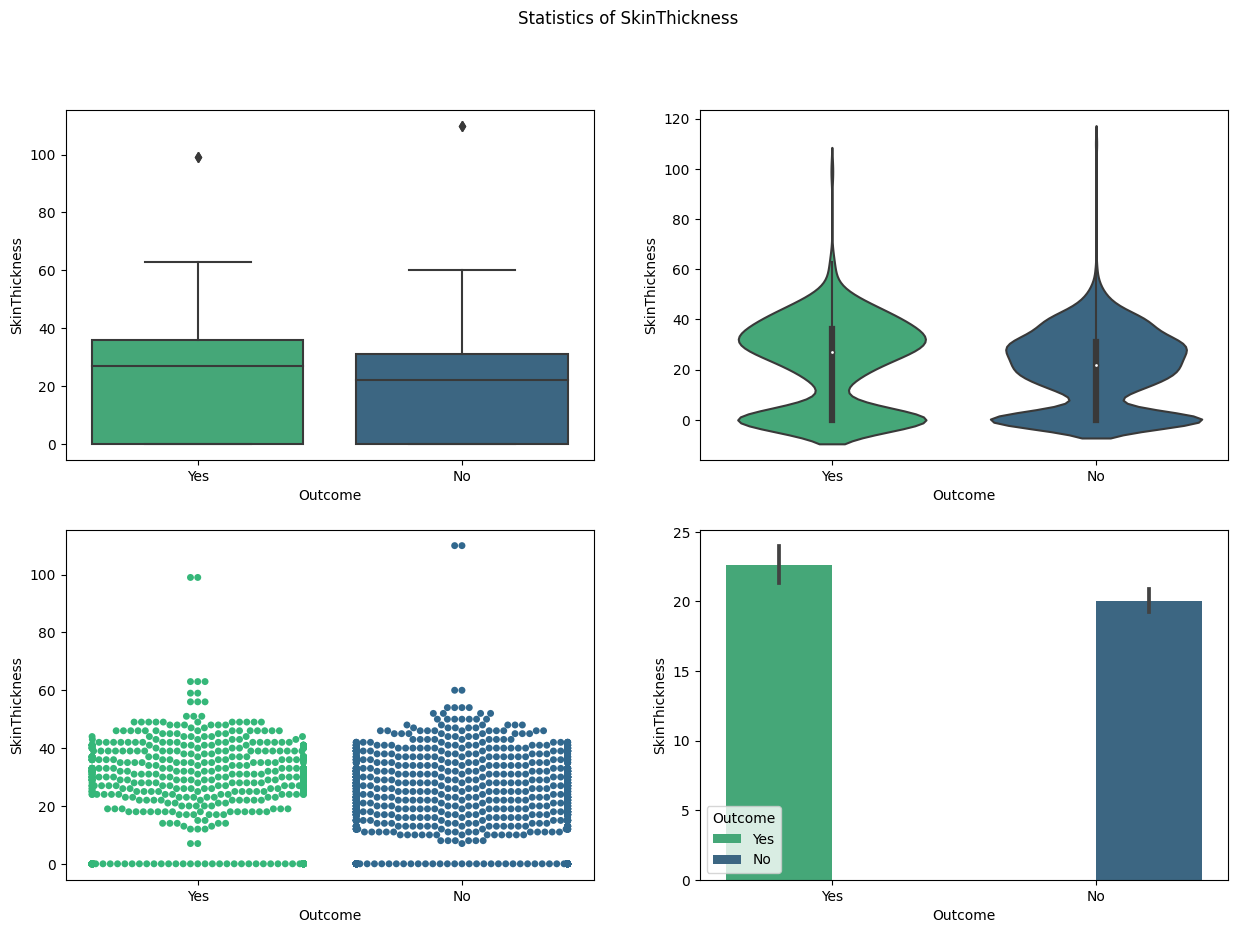

In [30]:
plot_stats('SkinThickness')

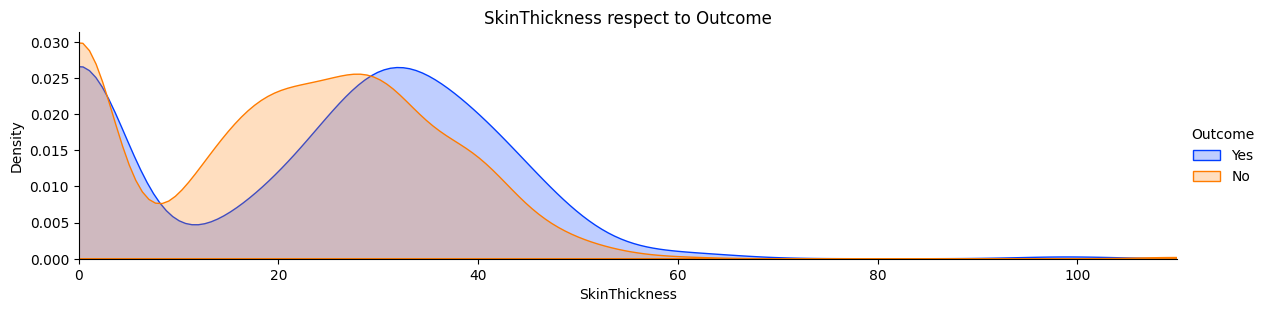

In [31]:
plot_kde('SkinThickness')

### Insulin

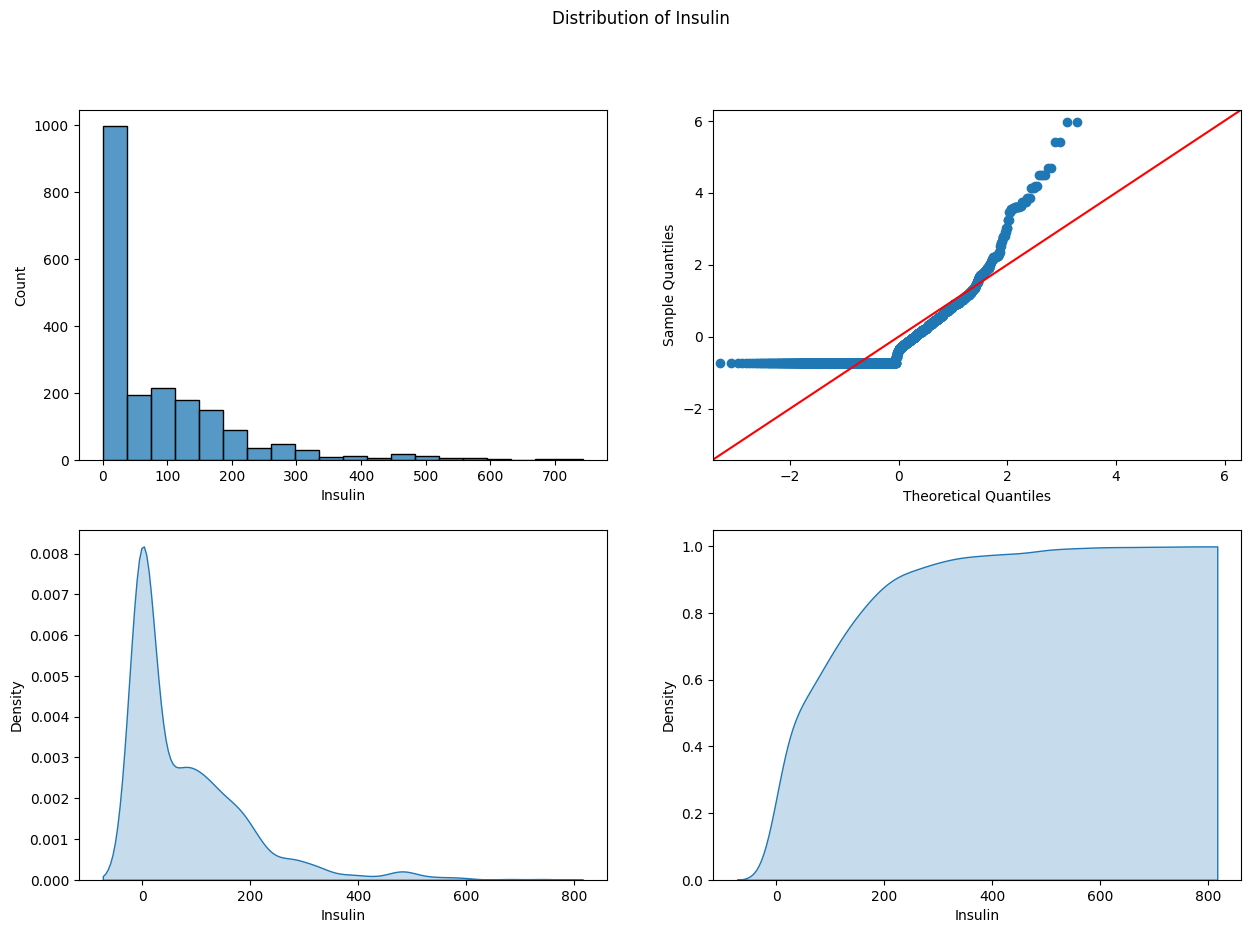

In [32]:
plot_distribution('Insulin')

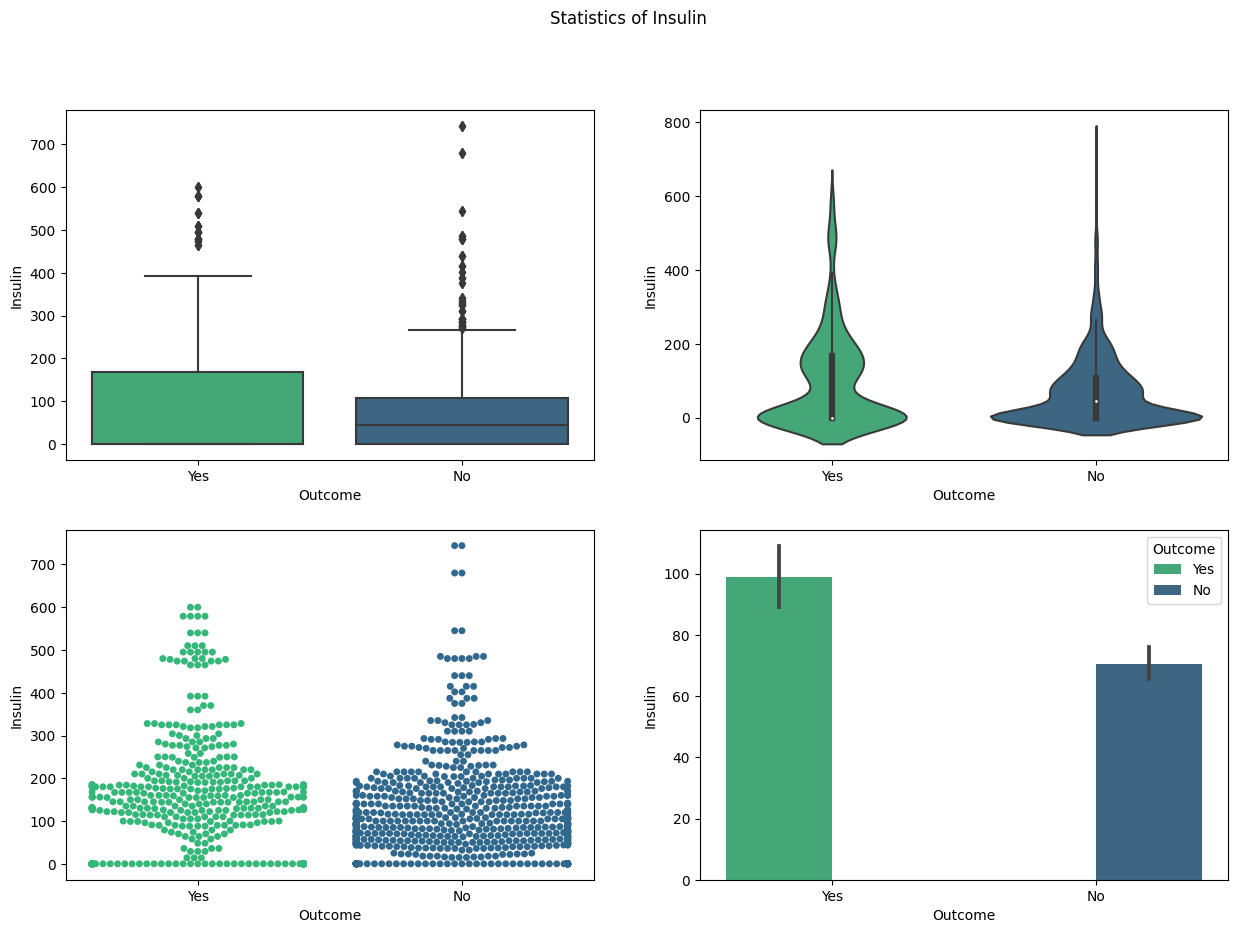

In [33]:
plot_stats('Insulin')

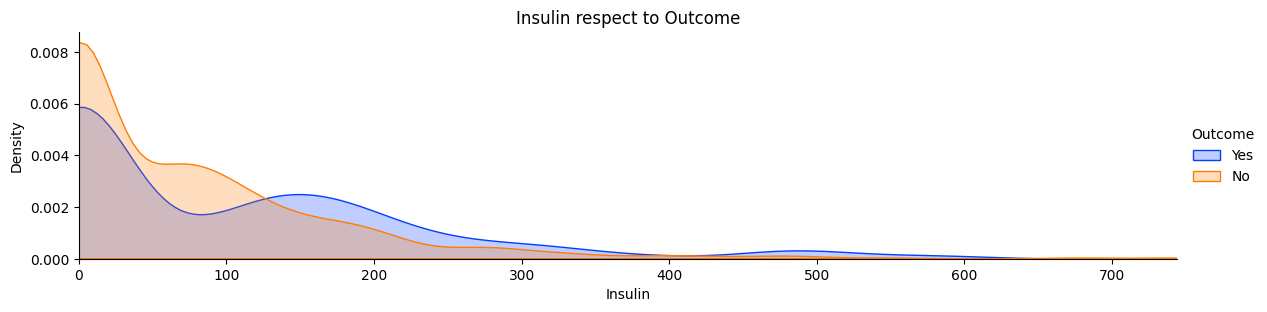

In [34]:
plot_kde('Insulin')

### BMI


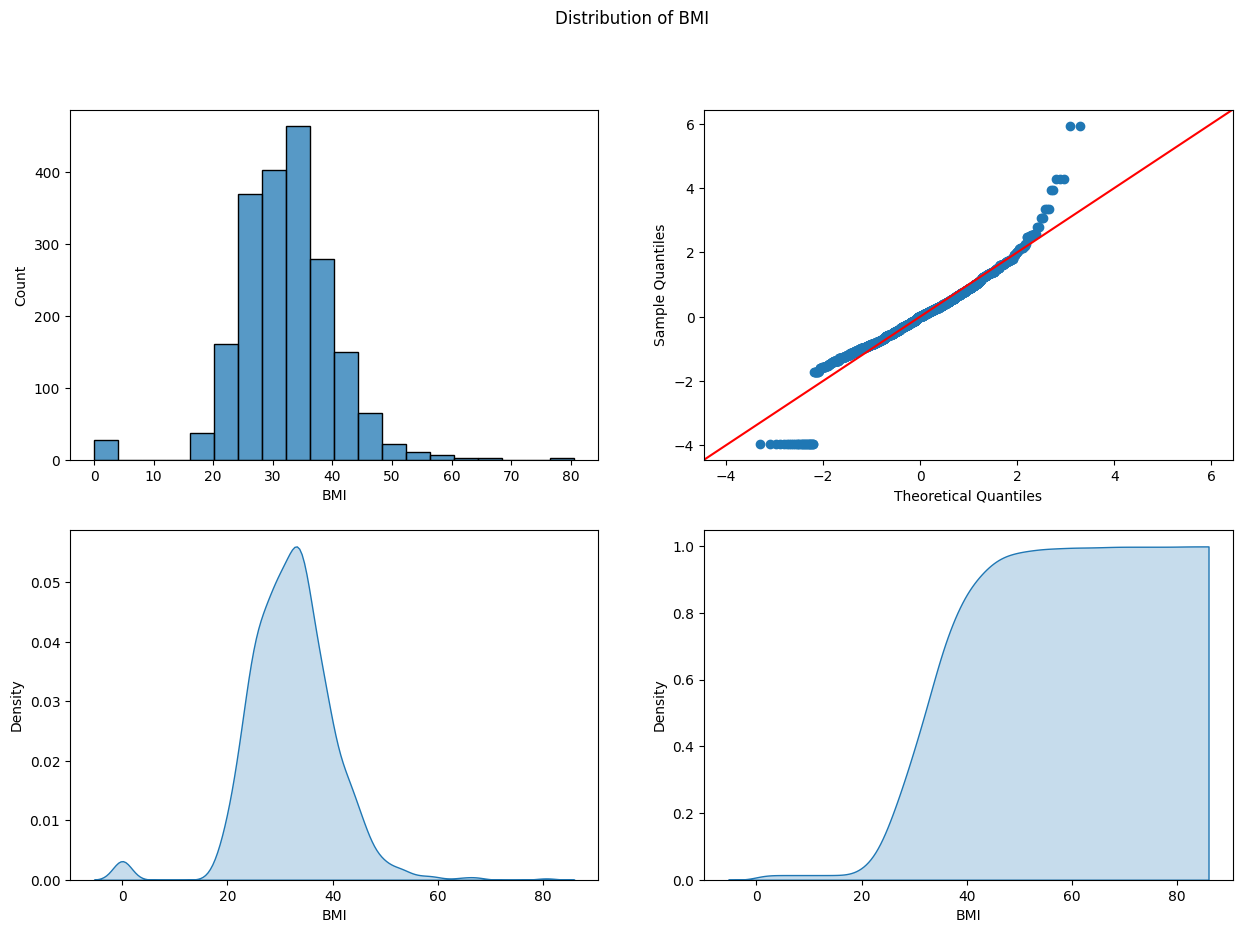

In [35]:
plot_distribution('BMI')

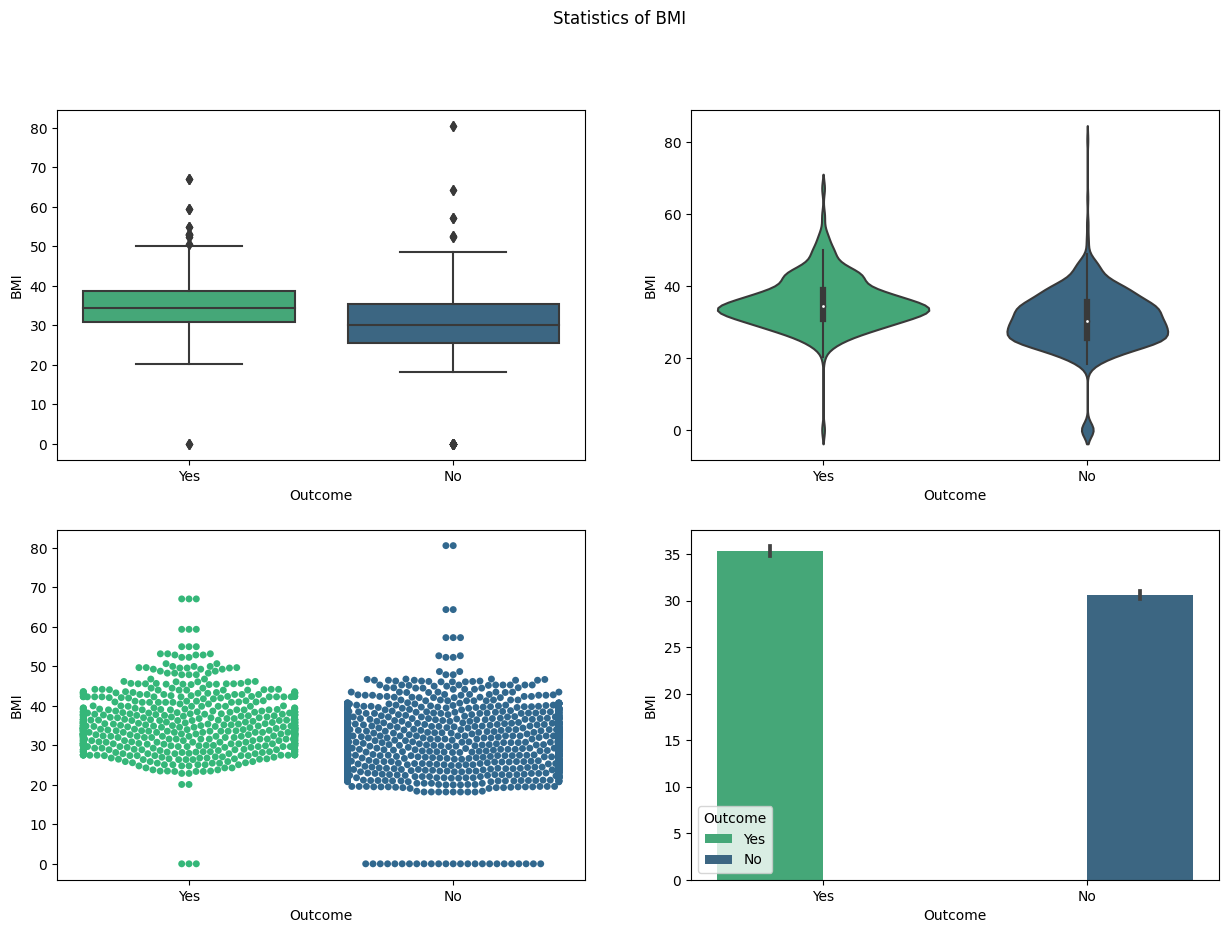

In [36]:
plot_stats('BMI')

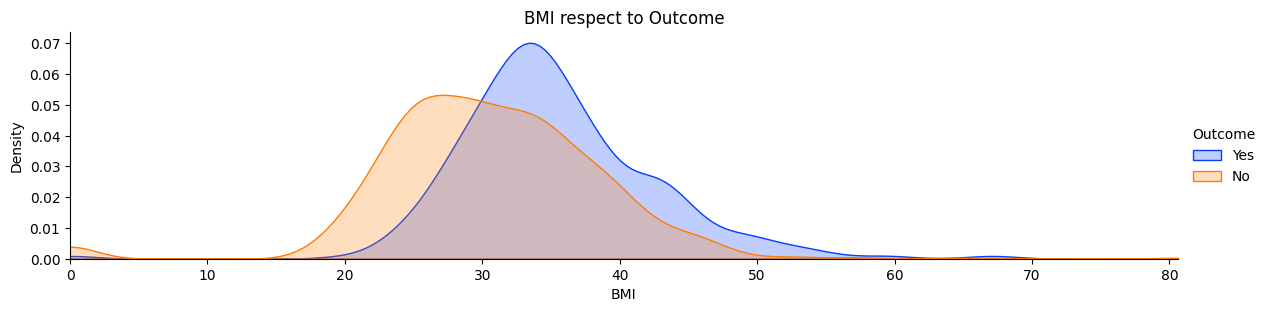

In [37]:
plot_kde('BMI')

### Diabetes Pedigree Function (DPF)

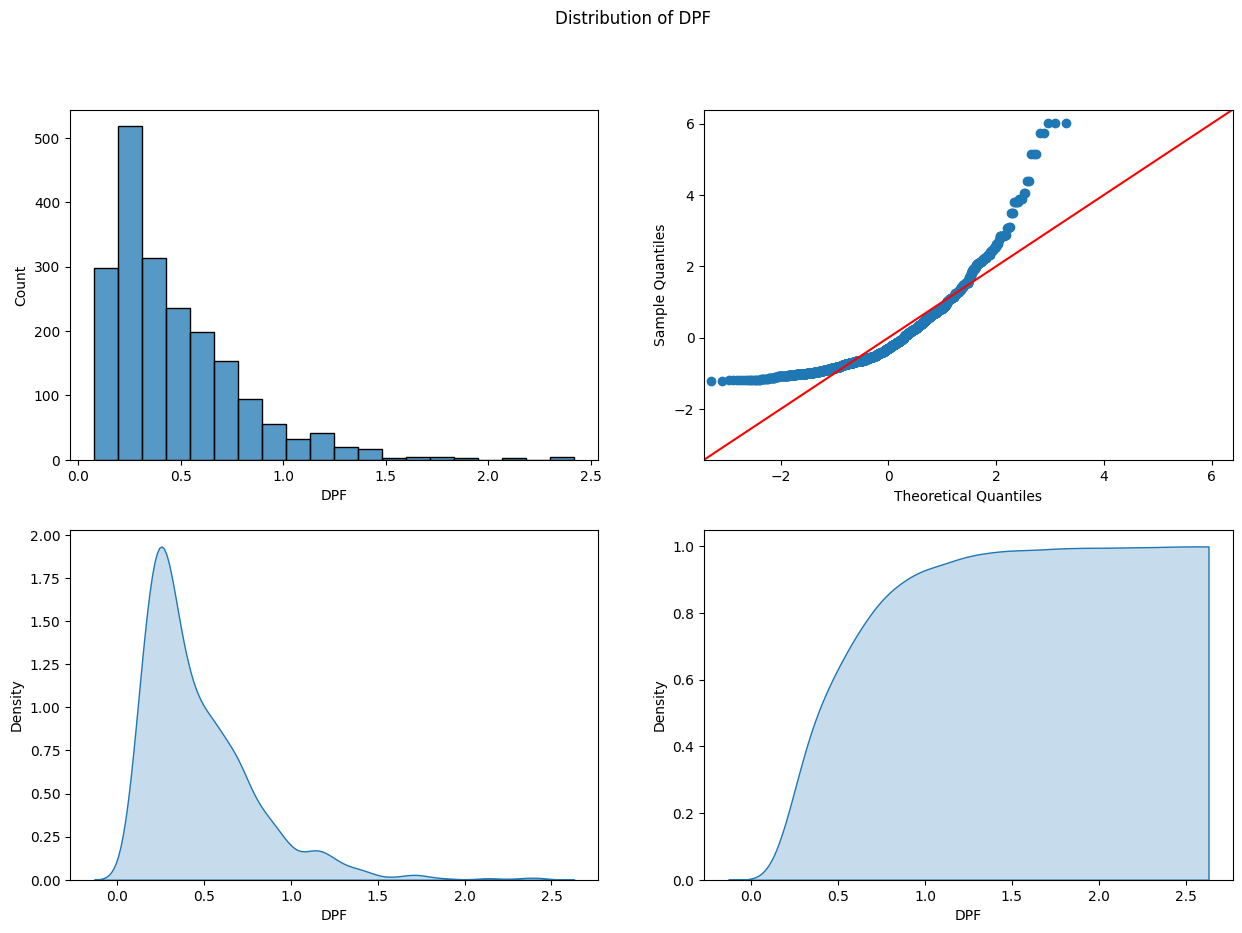

In [38]:
plot_distribution('DPF')

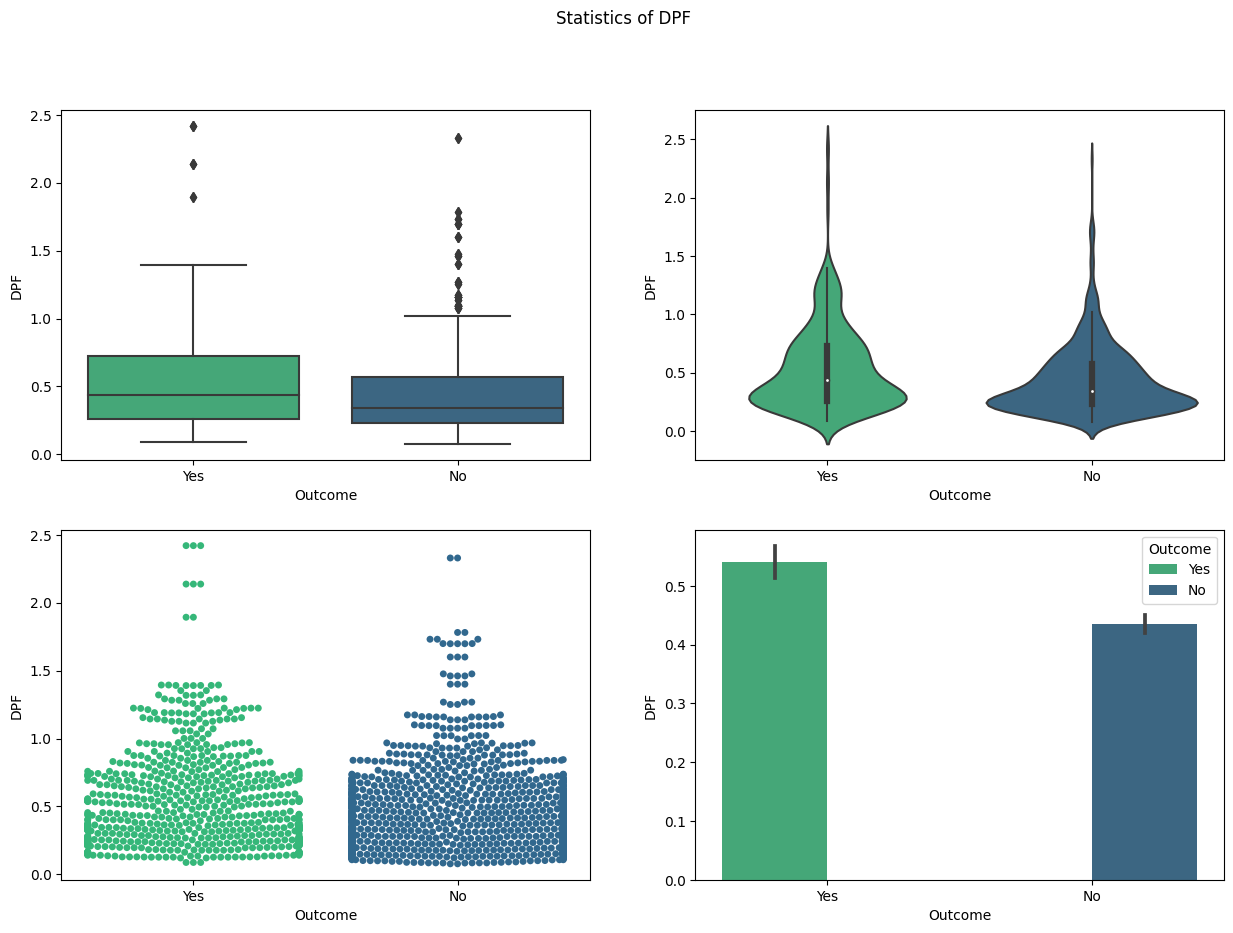

In [39]:
plot_stats('DPF')

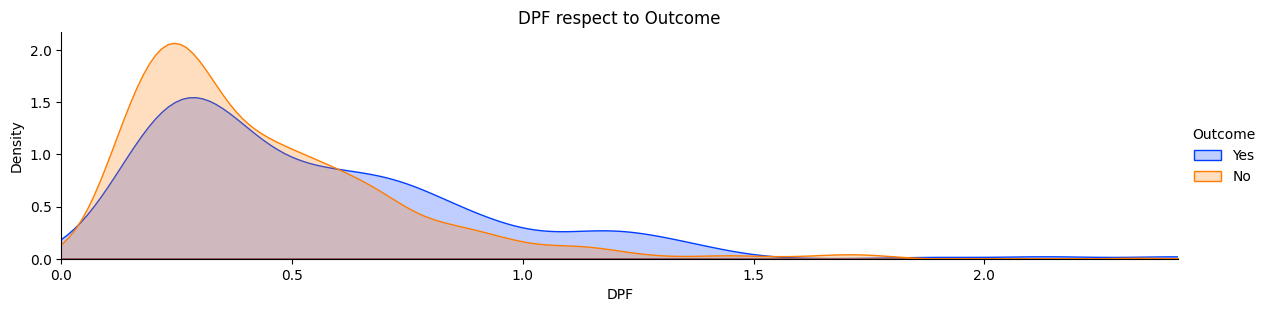

In [40]:
plot_kde('DPF')

### Age

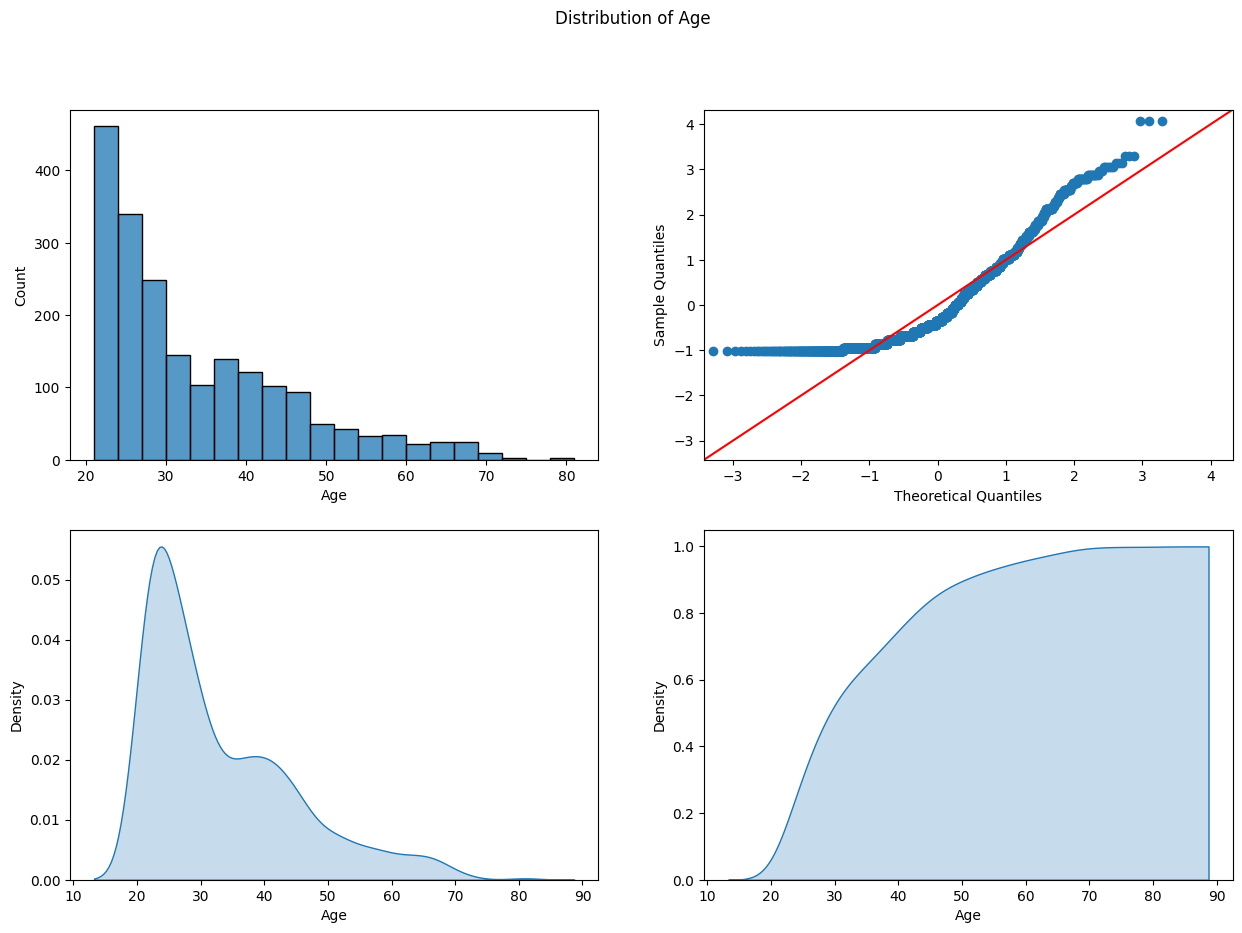

In [41]:
plot_distribution('Age')

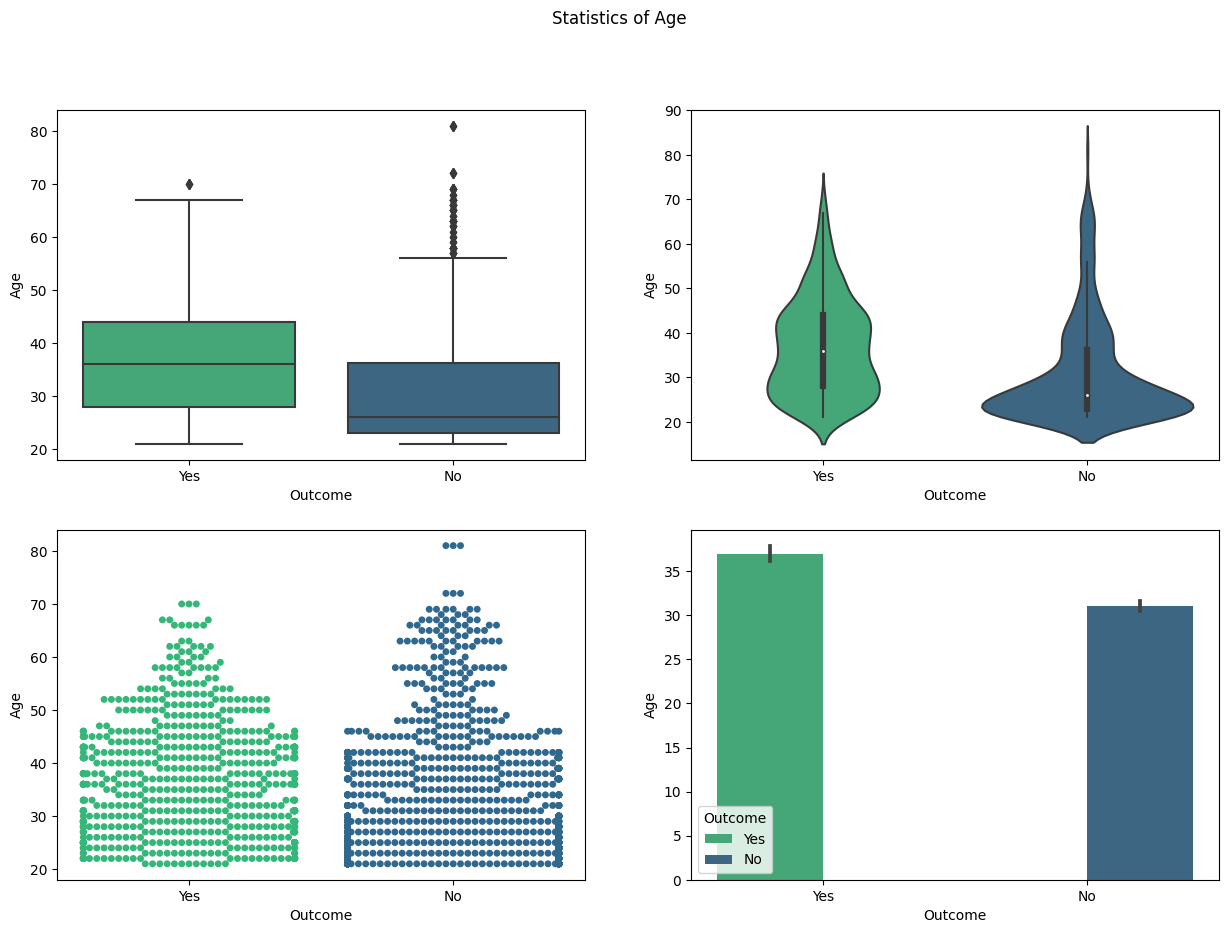

In [42]:
plot_stats('Age')

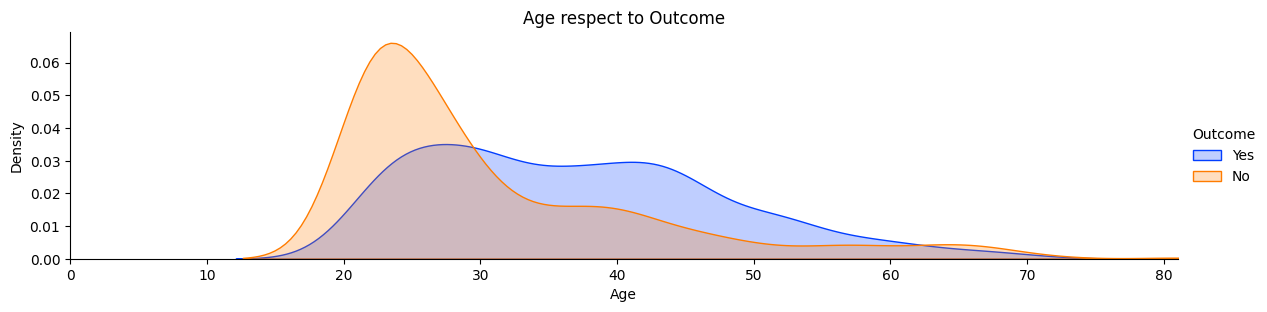

In [43]:
plot_kde('Age')

### Pairplot

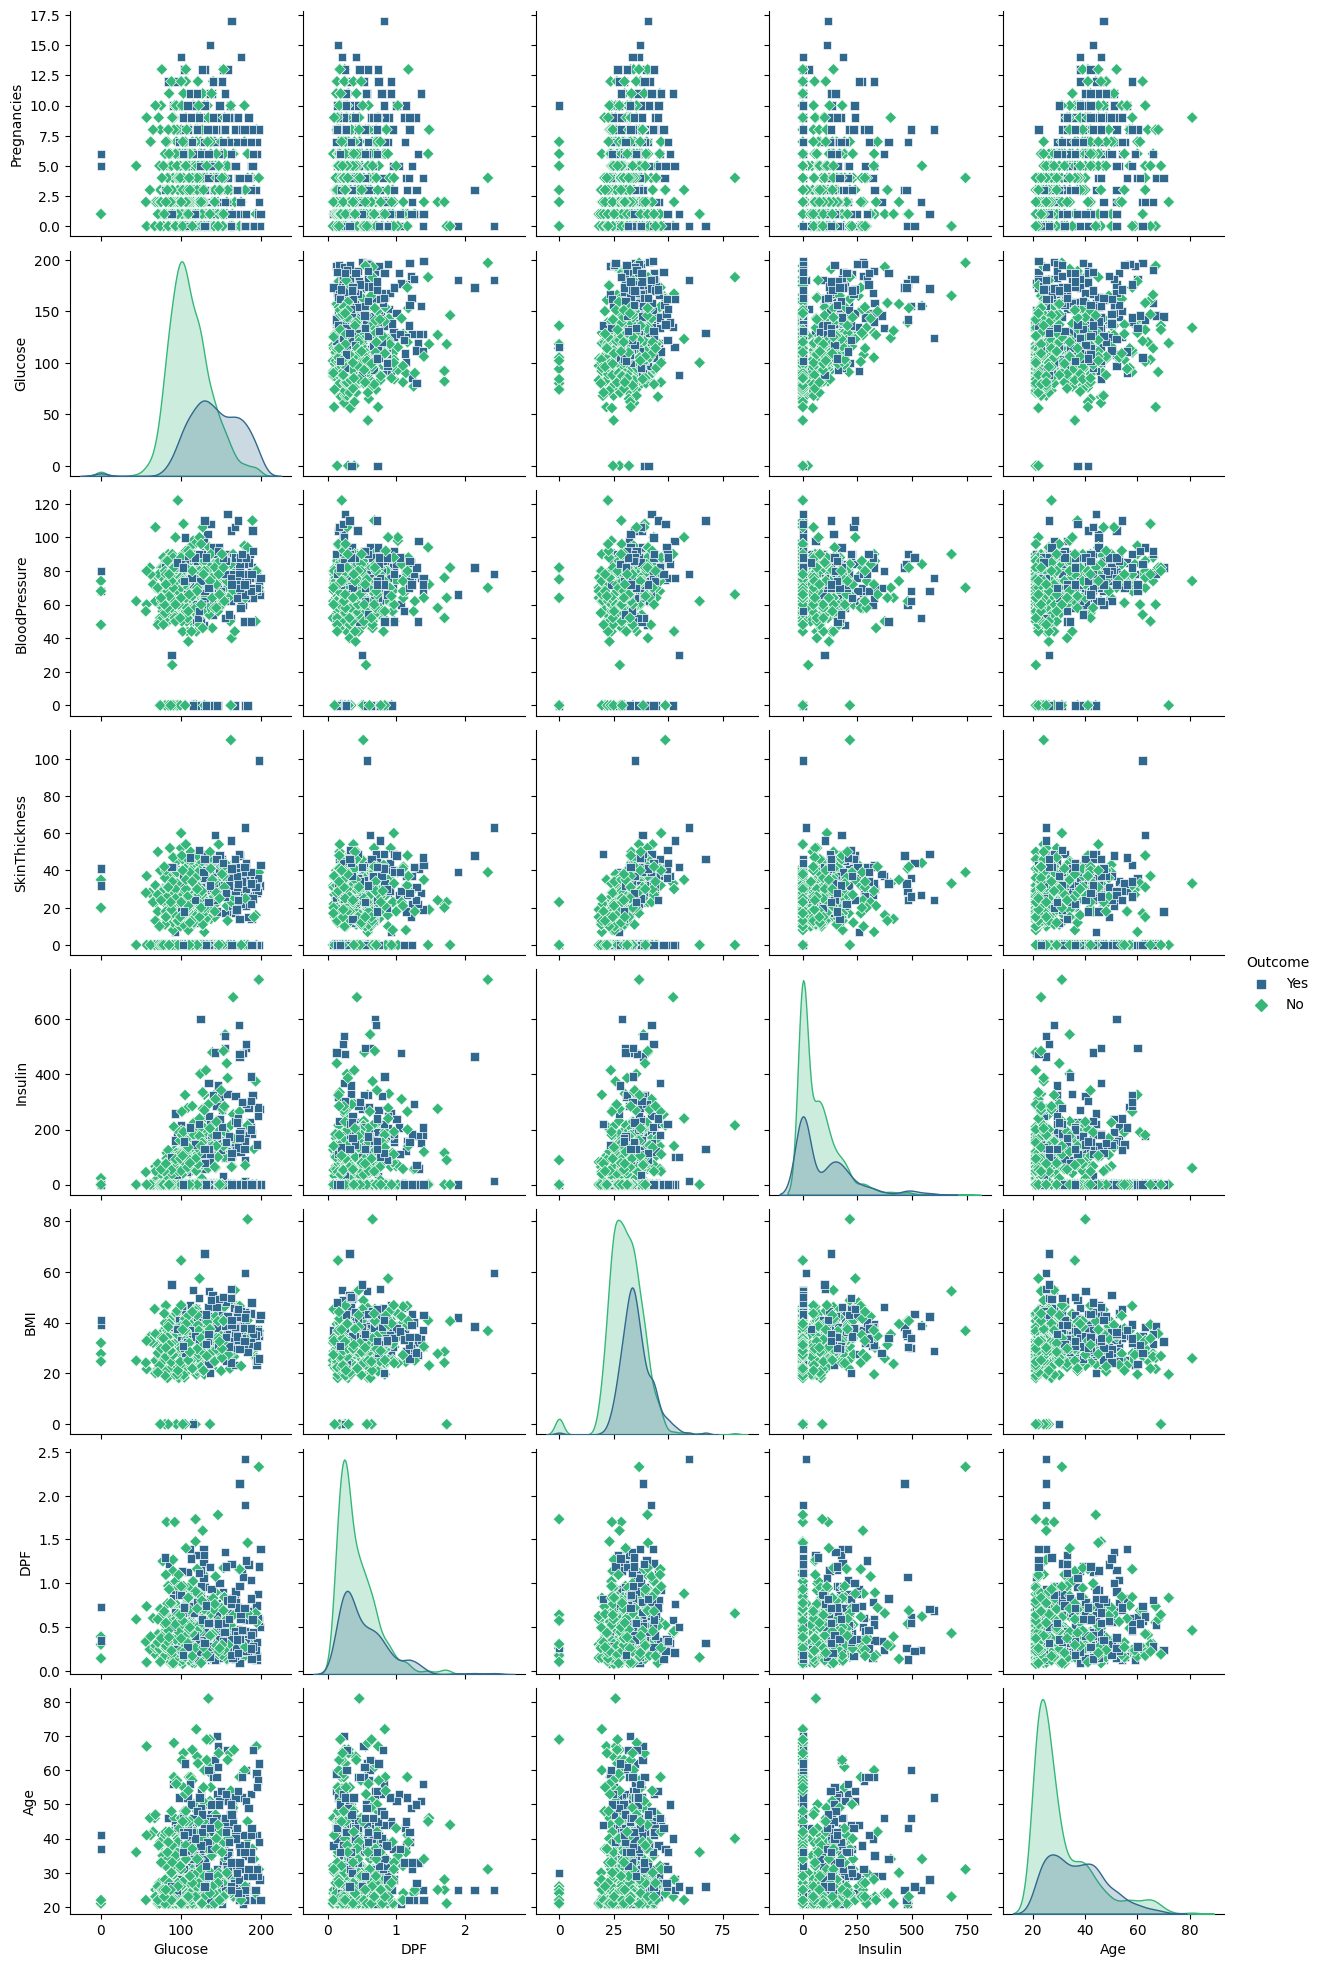

In [44]:
# Pairplot with given columns in x axis and all columns in y axis
sns.pairplot(df, hue = 'Outcome', x_vars = ["Glucose", "DPF", "BMI", "Insulin", "Age"], markers = ["s","D"], palette="viridis")

plt.show() 

### Feature Engineering

In [45]:
# Replacing the 0 values in the Dataset as it can make the model inefficient
[ df.loc[df[column] == 0,column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"] ]

[573, 90, 956, 13, 28]

In [46]:
# Replace zeros with mean, median depending upon distribution

df["SkinThickness"] = np.where( df["SkinThickness"] == 0, df["SkinThickness"].median(), df["SkinThickness"])

df[ "BloodPressure"] = np.where( df[ "BloodPressure"] == 0, df[ "BloodPressure"].mean(), df[ "BloodPressure"])

df["Insulin"] = np.where( df["Insulin"] == 0, df["Insulin"].median(), df["Insulin"])

df["Glucose"] = np.where( df["Glucose"] == 0, df["Glucose"].mean(), df["Glucose"])

df["BMI"] = np.where( df["BMI"] == 0, df["BMI"].median(), df["BMI"])

In [47]:
# Number of zeros after replacing
[ df.loc[df[column] == 0,column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"] ]

[0, 0, 0, 0, 0]

In [48]:
# Replace the Yes/No in the Outcome column as 0's and 1's
df['Outcome'].replace(to_replace={'No':0, 'Yes':1}, inplace=True)


In [49]:
# Sample
df.sample()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1015           11    103.0           68.0           40.0     40.0  46.2   

        DPF  Age  Outcome  
1015  0.126   42        0

### Correlation

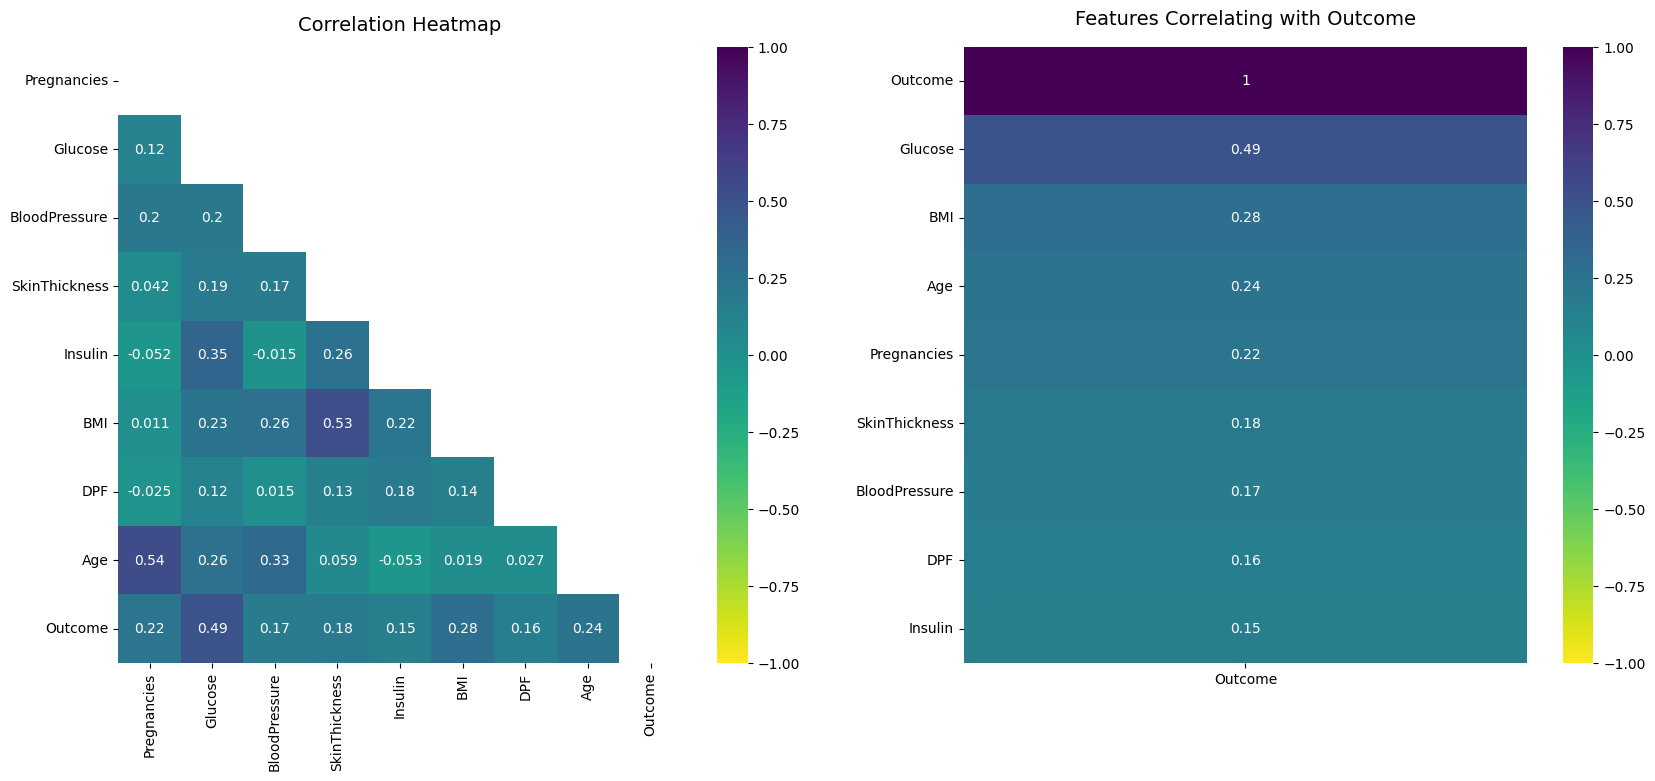

In [50]:
# Create a 1 x 2 subplot grid
fig, ax = plt.subplots( ncols=2, figsize=(20, 8) ) 

# Calculate spearman correlation of the dataframe
resign_corr = df.corr( method="pearson" ) 

mask = np.triu( np.ones_like(resign_corr, dtype=np.bool) )

# Cornor heatmap of the dataframe correlation
cat_heatmap = sns.heatmap( df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="viridis_r" )  

# Sets the title for the heatmap with font size 14 and padding 12
cat_heatmap.set_title( "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12 ) 

# Create heatmap for features correlating with the dependant varibale 'Outcome'
heatmap = sns.heatmap( resign_corr[["Outcome"]].sort_values(by="Outcome", ascending=False),vmin=-1,vmax=1,
                       annot=True,ax=ax[1],cmap="viridis_r" )  

# Sets the title for the heatmap with font size 14 and padding 16
heatmap.set_title( "Features Correlating with Outcome",fontdict={"fontsize": 14},pad=16 )

plt.show() 

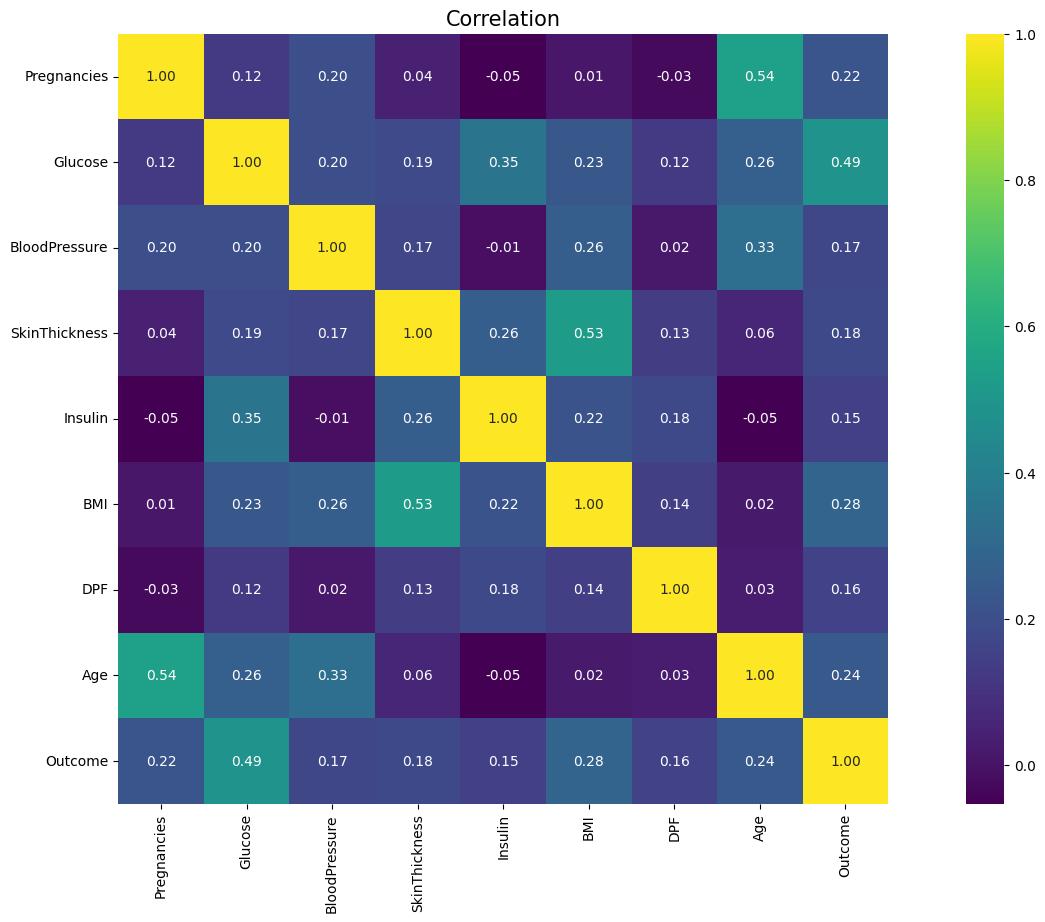

In [51]:
# Create a pearson correlation heatmap with figure size (20, 10)
plt.figure(figsize=(20, 10))

sns.heatmap(resign_corr, annot=True, fmt=".2f", square=True, cmap="viridis")

plt.title("Correlation", size=15)

plt.show()

### Separating the Dependant and Independant Variables

In [52]:
X = df.drop(["Outcome"],axis = 1) # X contains all independant variables
y = df["Outcome"] # Y contains only the dependant variable (Outcome)

In [53]:
# Sample
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            2    138.0        62.0000           35.0     40.0  33.6  0.127   
1            0     84.0        82.0000           31.0    125.0  38.2  0.233   
2            0    145.0        69.1455           23.0     40.0  44.2  0.630   
3            0    135.0        68.0000           42.0    250.0  42.3  0.365   
4            1    139.0        62.0000           41.0    480.0  40.7  0.536   

   Age  
0   47  
1   23  
2   31  
3   24  
4   21

In [54]:
# Sample
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

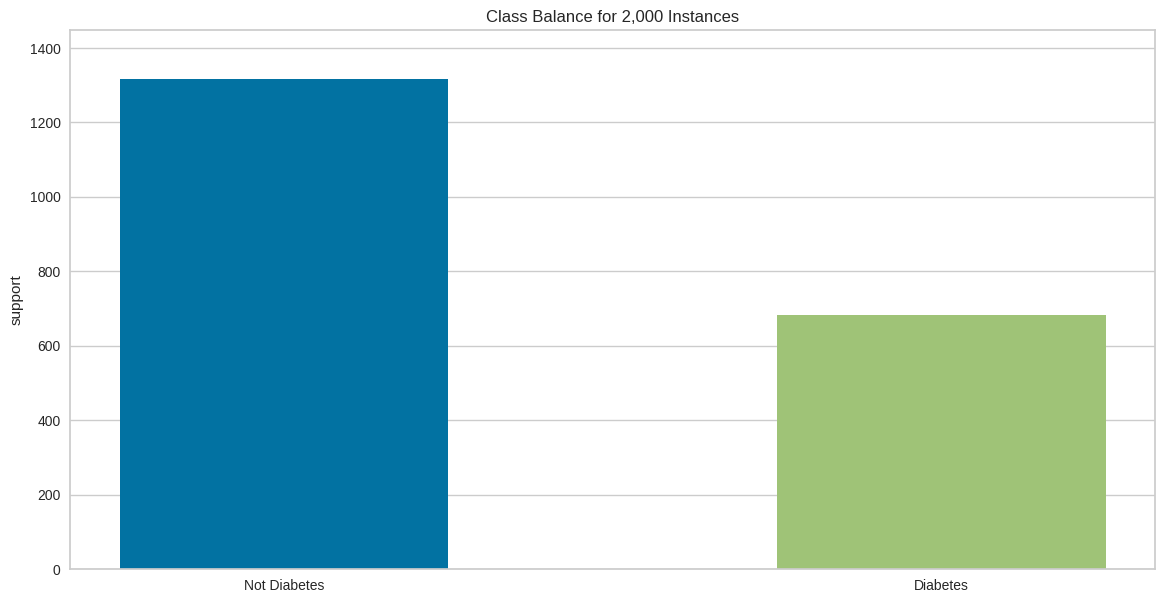

In [55]:
# Class balance between dependant column 'Outcome' values
from yellowbrick.target import ClassBalance

classes = ["Not Diabetes", "Diabetes"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes)
viz.fit(y)
viz.show()
plt.show()

The classes are not balanced properly. This kind of imbalance would cause the model to give biased predictions. Let us Balance the Dataset using Sampling

### Sampling

In [56]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

# To make the dependant variable balanced using SMOTETomek method
smt = combine.SMOTETomek(random_state=14)

# Resampling the dataset
X, y = smt.fit_resample(X, y) 

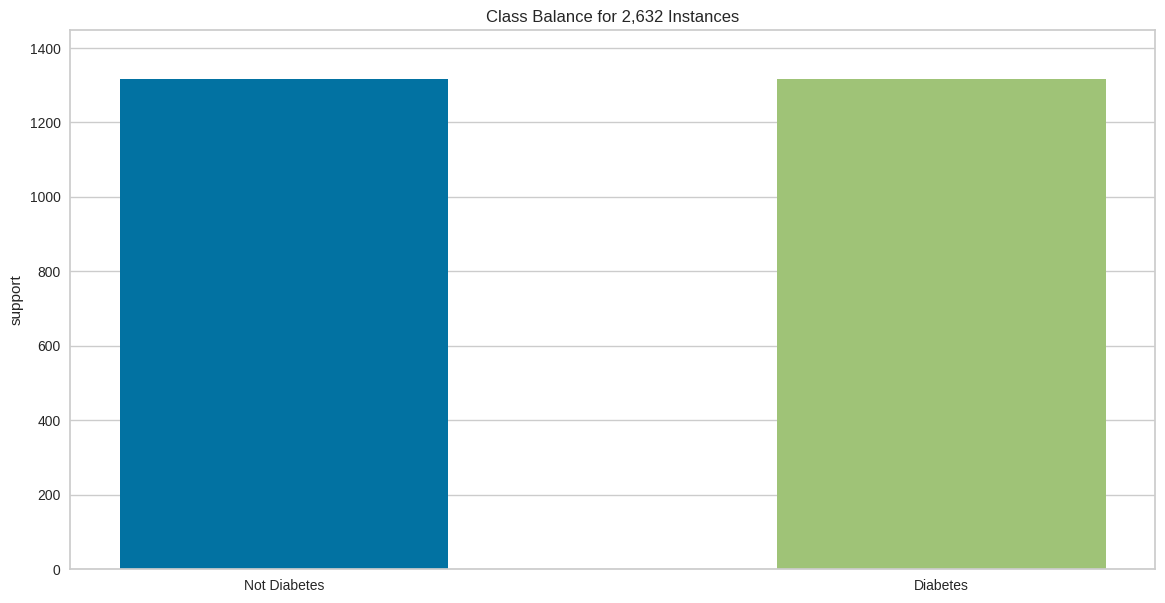

In [57]:
# Check for imbalance
classes = ["Not Diabetes", "Diabetes"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes)
viz.fit(y)
viz.show()
plt.show()

Now the Classes are balanced correctly.

### Correlation to Outcome

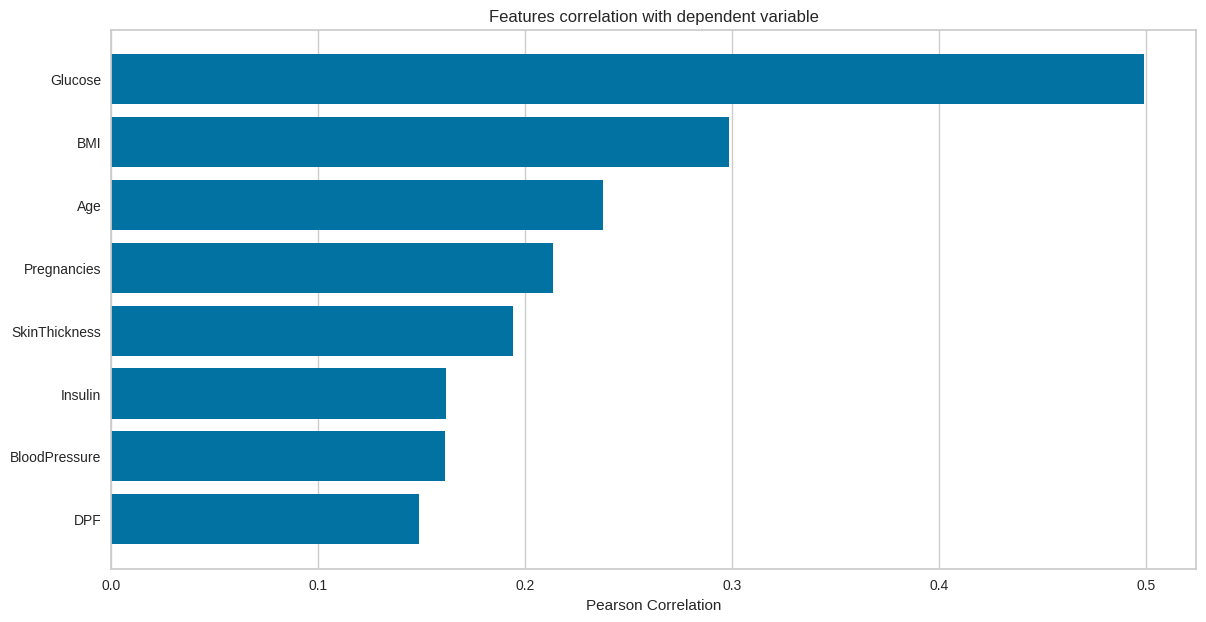

In [58]:
# Displays the Features correlation with dependant variable 'Outcome' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="pearson", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()
     

In [59]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Splitting the dataset with the train:test ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

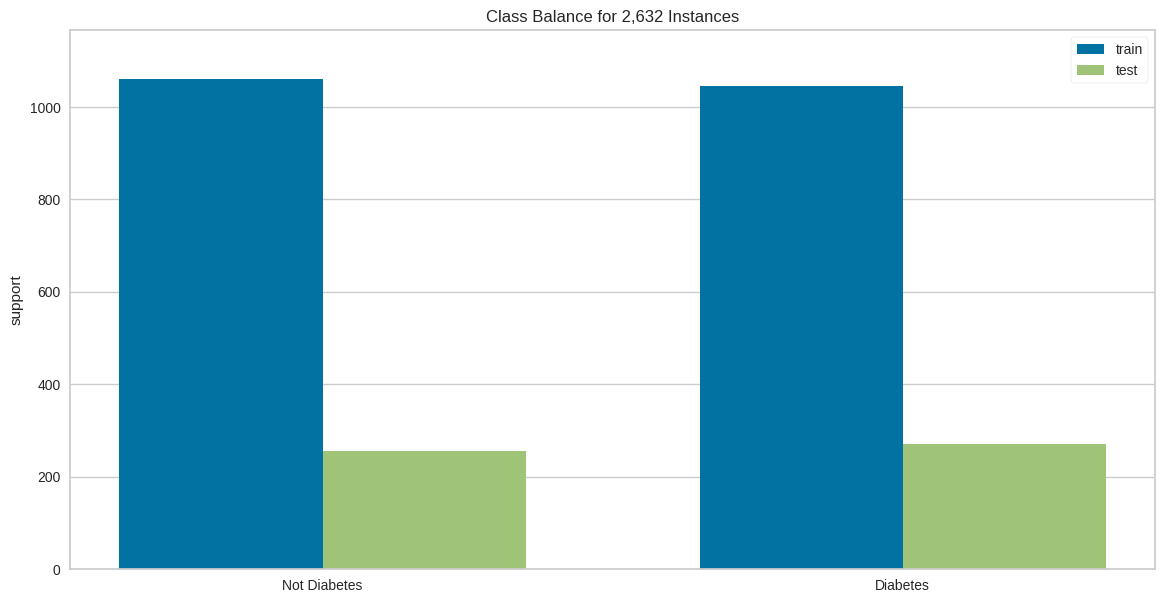

In [60]:
# Checks Class balance between training & testing sets
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes)
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Classification Pipeline

In [61]:
# Importing the required Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = [
    LogisticRegression(solver = 'liblinear'), SVC(), KNeighborsClassifier(), 
    DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()
    ]

In [62]:
# Evaluation Metrics

from sklearn import metrics
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [63]:
model_list = [
    "Logistic Regression", "SVC", "KNeighborsClassifier", 
    "DecisionTreeClassifier", "RandomForestClassifier", "GaussianNB"
    ]

acc_list = []
auc_list = []
cm_list = []
F1_list = []
for model in model_pipeline:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc_list.append(round(metrics.accuracy_score(y_test,y_pred),2))
  F1_list.append(round(metrics.f1_score(y_test,y_pred),2))
  fpr,tpr, threshold = metrics.roc_curve(y_test,y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

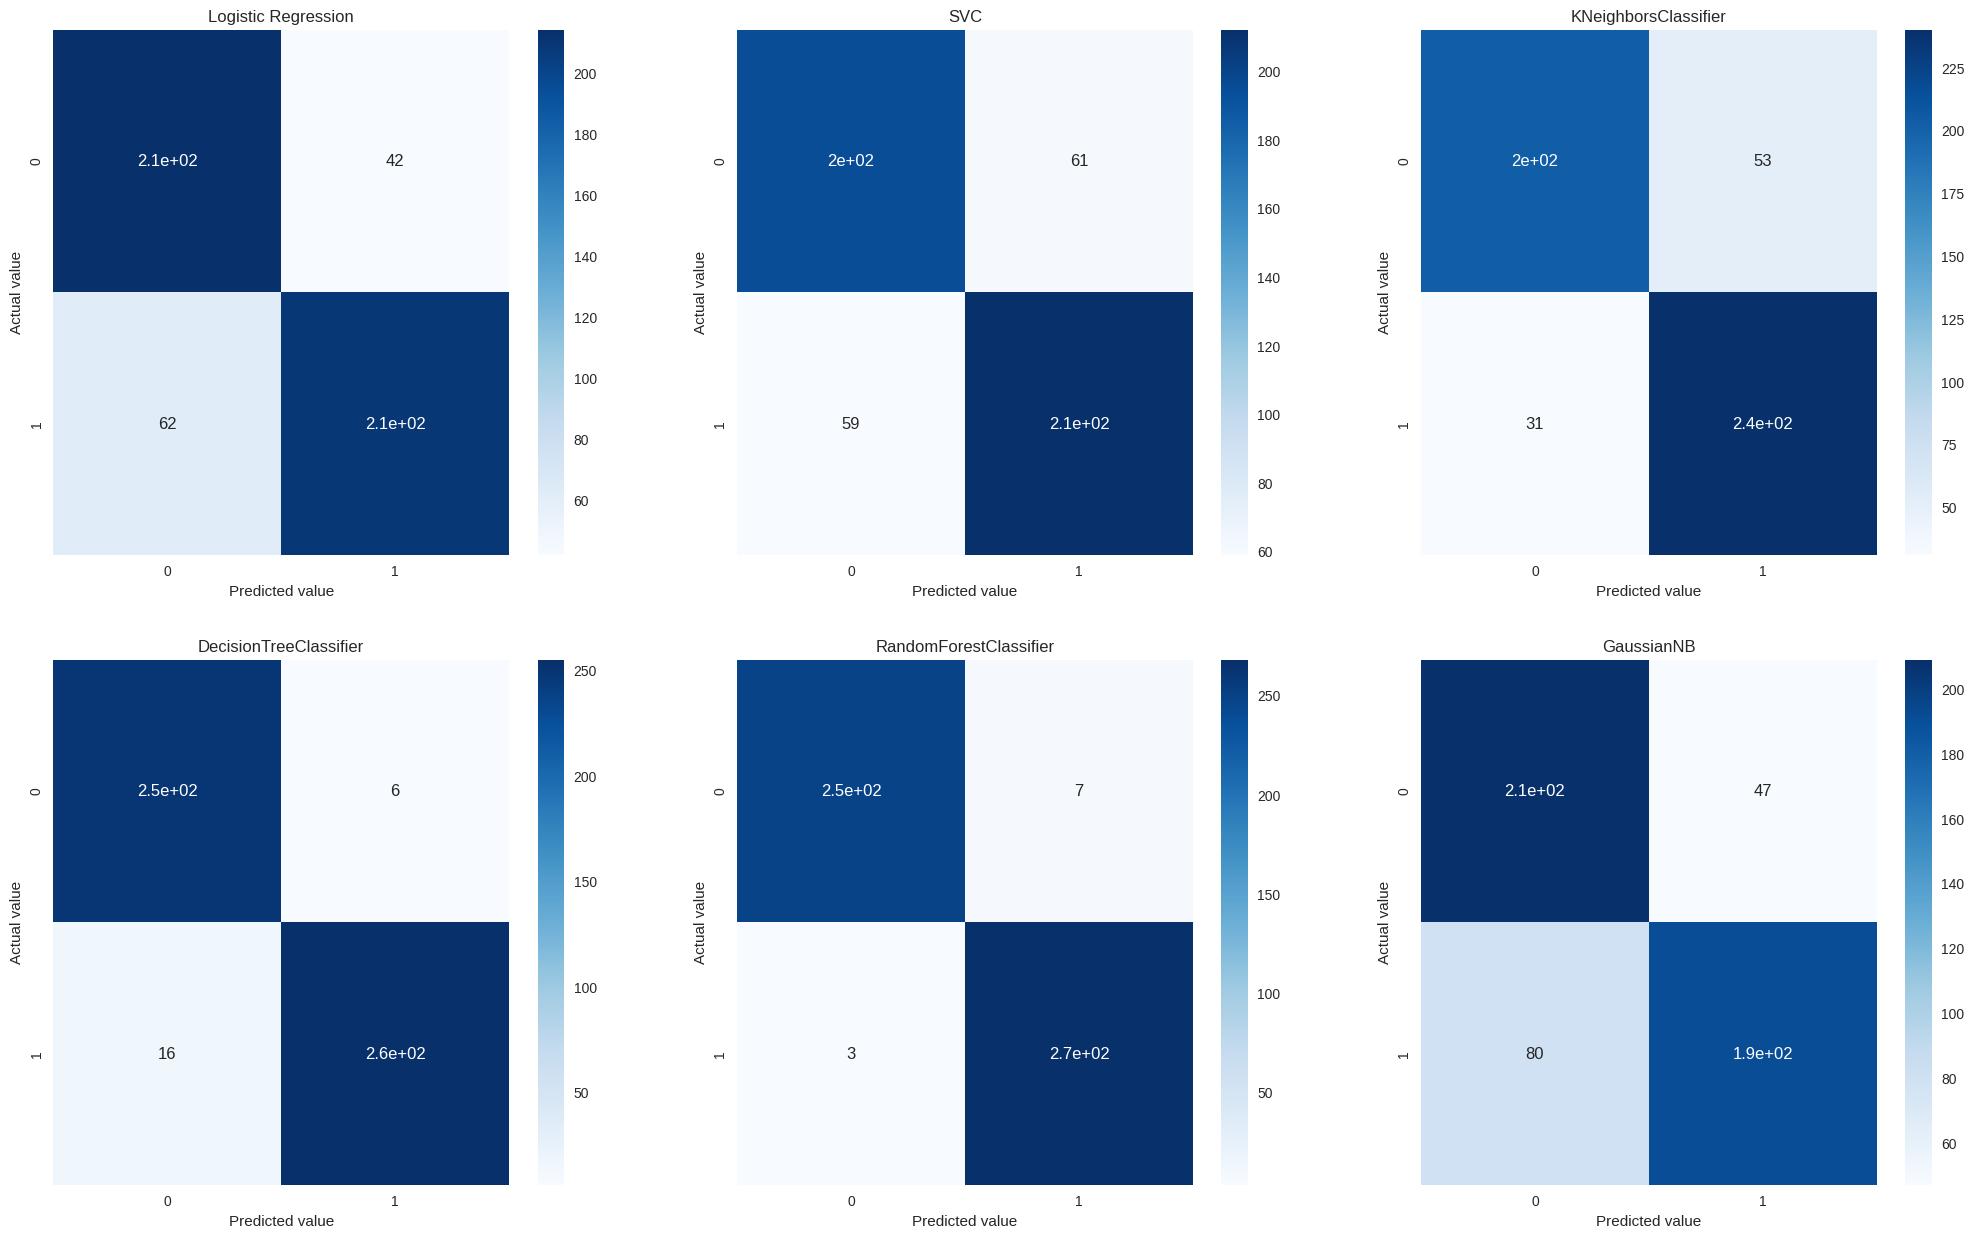

In [64]:
# Plot the Confusion Matrix for the Pipeline
fig = plt.figure(figsize=(25,15))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model  = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plt = sns.heatmap(cm, annot = True, cmap = 'Blues')
  cm_plt.set_xlabel("Predicted value")
  cm_plt.set_ylabel("Actual value")

In [65]:
# Metrics for the Classification Pipeline
met_df = pd.DataFrame({"Model" : model_list, "Accuracy" : acc_list, "AUC" : auc_list, "F1" : F1_list})
met_df

Model  Accuracy   AUC    F1
0     Logistic Regression      0.80  0.80  0.80
1                     SVC      0.77  0.77  0.78
2    KNeighborsClassifier      0.84  0.84  0.85
3  DecisionTreeClassifier      0.96  0.96  0.96
4  RandomForestClassifier      0.98  0.98  0.98
5              GaussianNB      0.76  0.76  0.75

The best performing model is RandomForestClassifier.

### Model Fitting

In [66]:
# Fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

In [67]:
# Predict the results
y_pred = rf_clf.predict(X_test)

In [68]:
# Evaluation Metrics
acc = metrics.accuracy_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall Score: {rec}")
print(f"Precision Score: {prec}")

Accuracy: 0.9810246679316889
F1 Score: 0.981549815498155
Recall Score: 0.981549815498155
Precision Score: 0.981549815498155


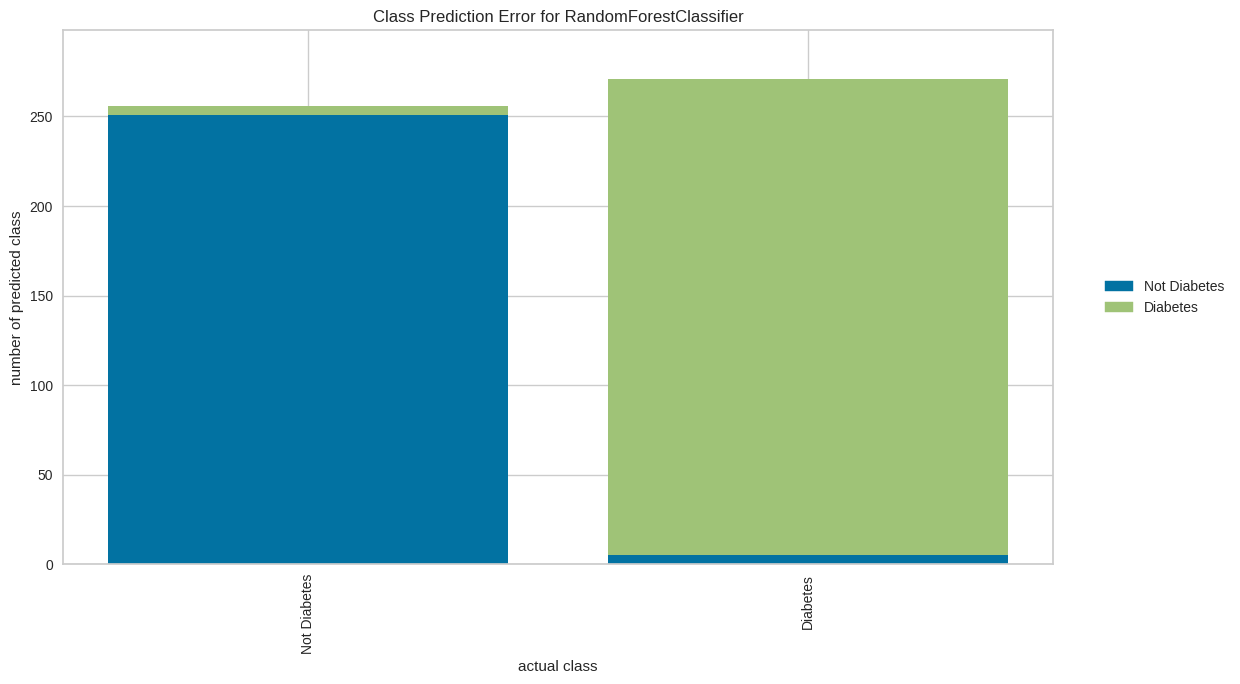

In [69]:
# Visualize Class Prediction Error
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error( rf_clf, X_train, y_train, X_test, y_test, classes=classes )
visualizer.show()
plt.show()

### ROC Curve


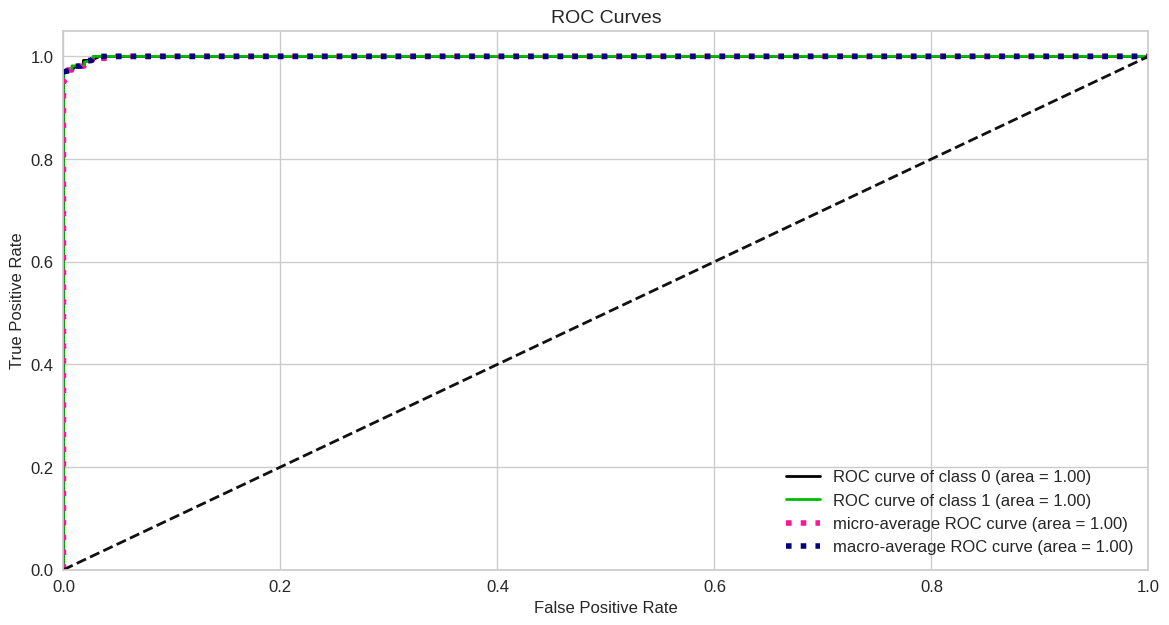

In [72]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)

# ROC Curve
from scikitplot.estimators import plot_learning_curve
y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()
     


# Precision Recall Curve

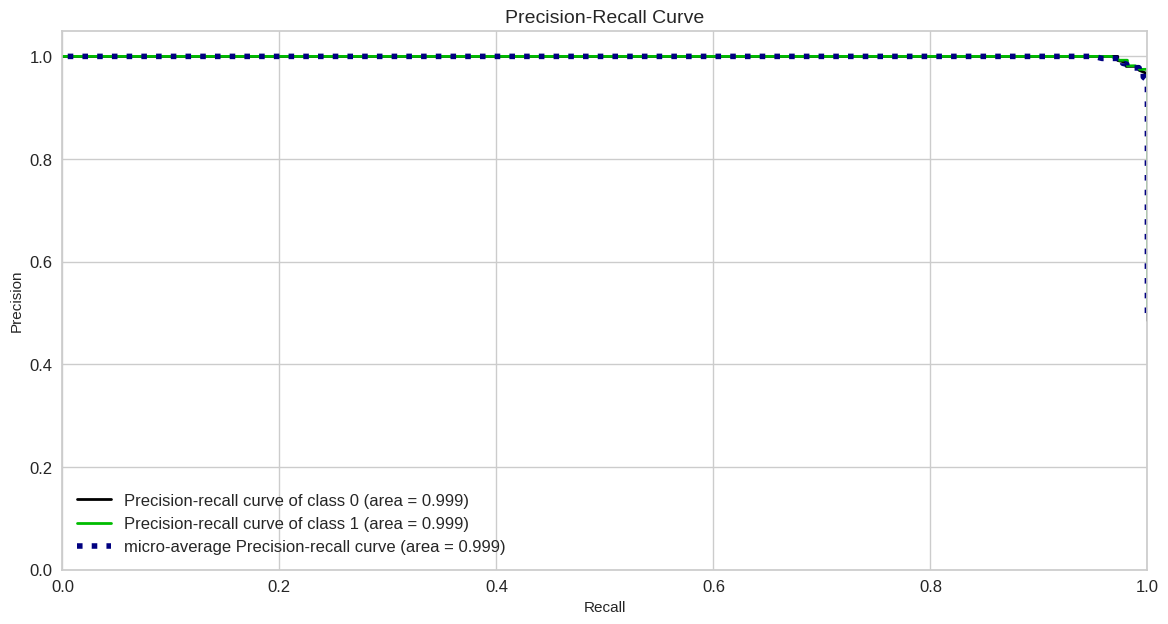

In [73]:
# Precision Recall Curve
plot_precision_recall(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

### Learning Curve

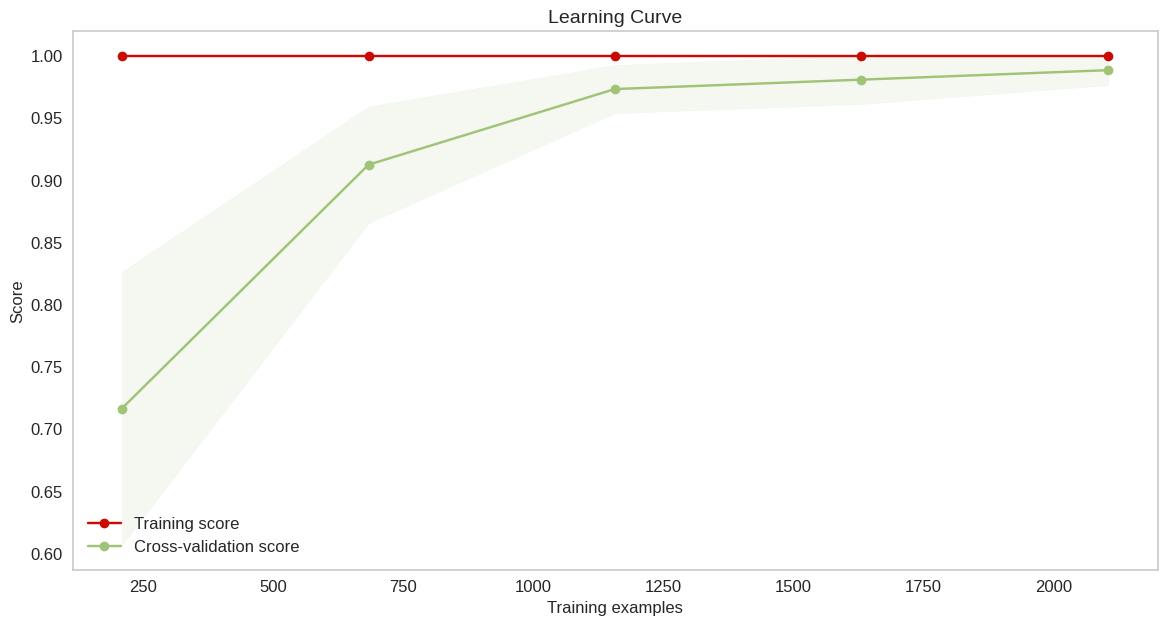

In [74]:
# Learning Curve
plot_learning_curve(rf_clf, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

### Lift Curve

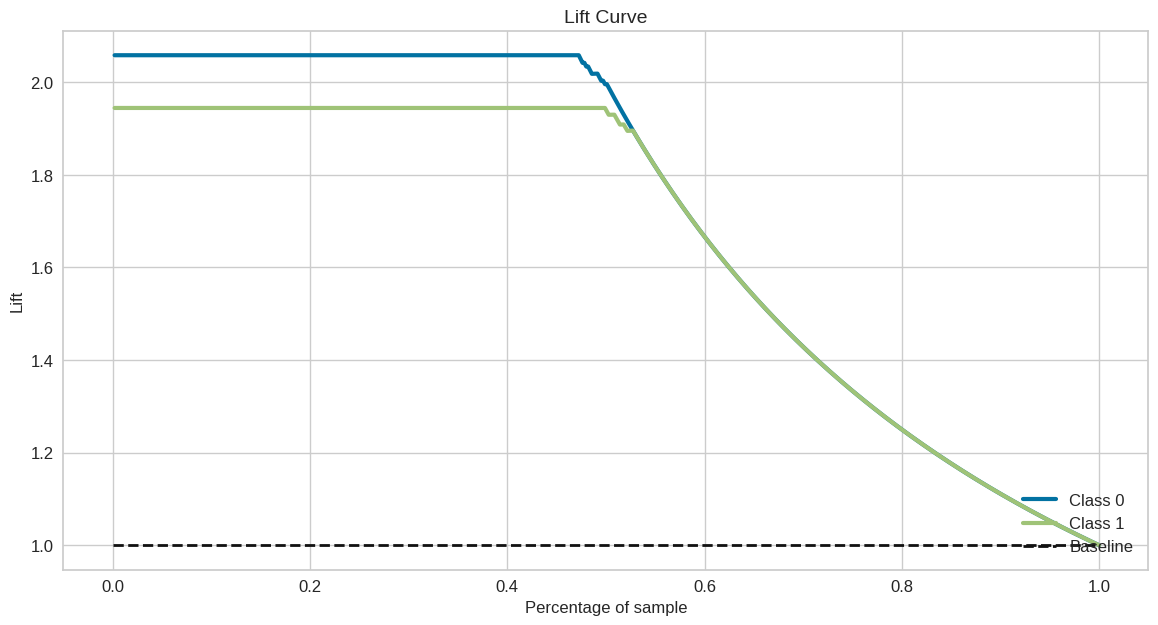

In [75]:
# Lift Curve
plot_lift_curve(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

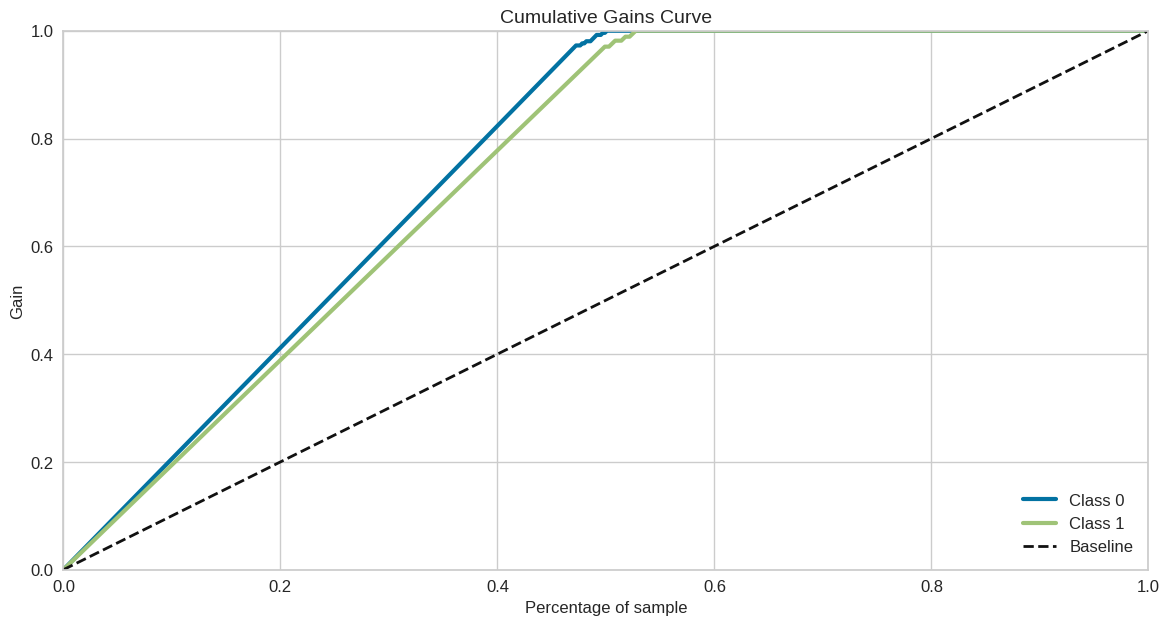

In [76]:
# Cumulative Gains Curve
plot_cumulative_gain(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

### Confusion Matrix

In [77]:
# Confusion Mtrix
confusion_matrix(y_test, y_pred)

array([[251,   5],
       [  5, 266]])

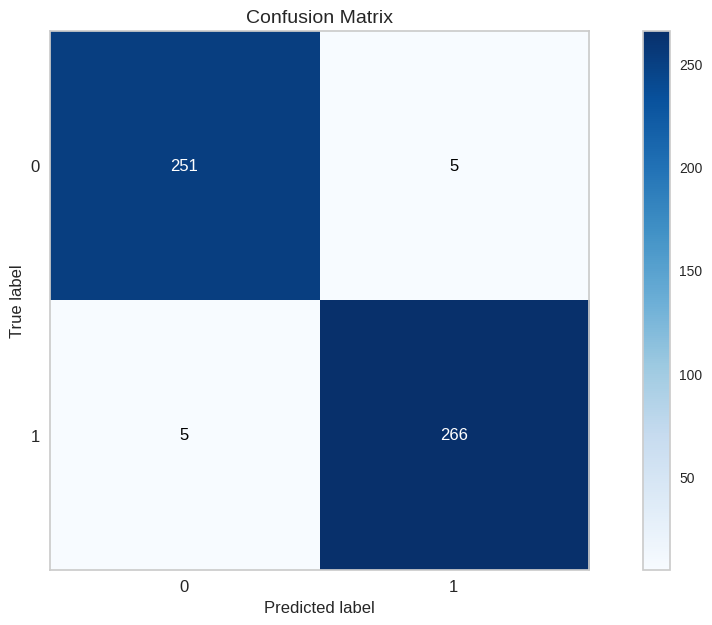

In [78]:
# Visualize Confusion Matrix
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

### Classification Report

In [80]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       256
           1       0.98      0.98      0.98       271

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527



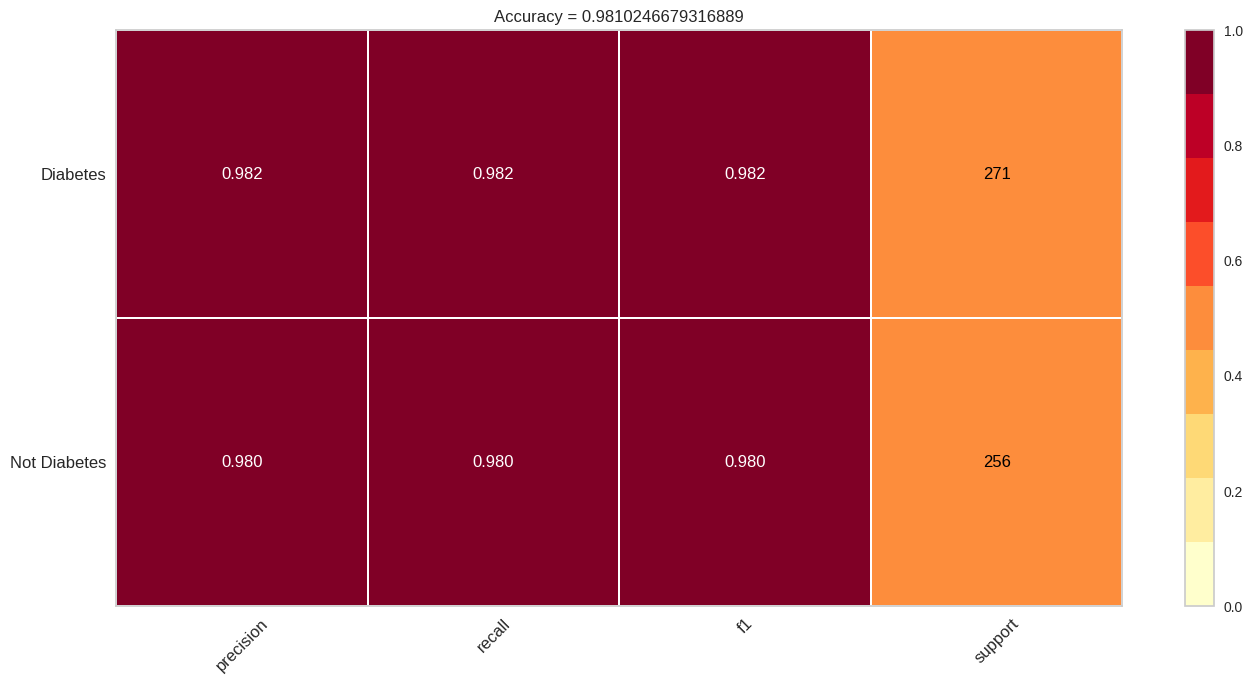

In [81]:
# Visualize the Classification Report
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}"
)
plt.show()


### Prediction

In [82]:
# Function to predict using the trained model
def predict_diabetes(
    Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]

    return rf_clf.predict(x)

In [83]:
# Sample Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Great! You don't have diabetes.


In [84]:
# Sample Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Oops! You have diabetes.


### Saving the Model

In [86]:
import os
import joblib

if not os.path.exists("../content/drive/MyDrive/models/"):
    os.mkdir("../content/drive/MyDrive/models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../content/drive/MyDrive/models/Diabetes_Predictor_RF.pkl")
print("Successfully Completed !")

Successfully Completed !
